In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import umap
import os
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
cmap = cm.nipy_spectral
from skimage import io
from label_dict import protein_to_num_full, protein_to_num_single_cells


In [66]:
df_master = pd.read_csv('/scr/mdoron/Dino4Cells/data/fixed_size_unmasked_single_cells_master.csv')
df_for_sc = pd.read_csv('/scr/mdoron/Dino4Cells/data/fixed_size_unmasked_single_cells_for_sc.csv')
df = pd.read_csv('/scr/mdoron/Dino4Cells/data/fixed_size_unmasked_single_cells.csv')
df_whole = pd.read_csv('/scr/mdoron/Dino4Cells/data/whole_images.csv')


In [24]:
df_master[['file','ID','cell_type','protein_location']]
# df[['file','ID','cell_type','protein_location']]


file  \
0        /scr/mdoron/Dino4Cells/data/fixed_size_masked_...   
1        /scr/mdoron/Dino4Cells/data/fixed_size_masked_...   
2        /scr/mdoron/Dino4Cells/data/fixed_size_masked_...   
3        /scr/mdoron/Dino4Cells/data/fixed_size_masked_...   
4        /scr/mdoron/Dino4Cells/data/fixed_size_masked_...   
...                                                    ...   
1134880  /scr/mdoron/Dino4Cells/data/fixed_size_masked_...   
1134881  /scr/mdoron/Dino4Cells/data/fixed_size_masked_...   
1134882  /scr/mdoron/Dino4Cells/data/fixed_size_masked_...   
1134883  /scr/mdoron/Dino4Cells/data/fixed_size_masked_...   
1134884  /scr/mdoron/Dino4Cells/data/fixed_size_masked_...   

                                           ID cell_type  \
0                              10005_921_B9_1     A-431   
1                              10005_921_B9_1     A-431   
2                              10005_921_B9_1     A-431   
3                              10005_921_B9_1     A-431   
4                              10005_921_B9_1     A-431   
...                                       ...       ...   
1134880  dea19dc6-bbca-11e8-b2bc-ac1f6b6435d0      MCF7   
1134881  dea19dc6-bbca-11e8-b2bc-ac1f6b6435d0      MCF7   
1134882  dea19dc6-bbca-11e8-b2bc-ac1f6b6435d0      MCF7   
1134883  dea19dc6-bbca-11e8-b2bc-ac1f6b6435d0      MCF7   
1134884  dea19dc6-bbca-11e8-b2bc-ac1f6b6435d0      MCF7   

                          protein_location  
0                              ['cytosol']  
1                              ['cytosol']  
2                              ['cytosol']  
3                              ['cytosol']  
4                              ['cytosol']  
...                                    ...  
1134880  ['nuclear bodies', 'nucleoplasm']  
1134881  ['nuclear bodies', 'nucleoplasm']  
1134882  ['nuclear bodies', 'nucleoplasm']  
1134883  ['nuclear bodies', 'nucleoplasm']  
1134884  ['nuclear bodies', 'nucleoplasm']  

[1134885 rows x 4 columns]

In [67]:
whole_image_single_cells_df = pd.merge(df_master, df, on='ID', suffixes=['left_',''])[['file','ID','cell_type','protein_location'] + list(protein_to_num_full.keys())]

In [68]:
whole_image_single_cells_df = whole_image_single_cells_df.drop_duplicates()

In [69]:
whole_image_single_cells_df.to_csv('/scr/mdoron/Dino4Cells/data/fixed_size_unmasked_single_cells_for_whole_image.csv', index=False)

In [ ]:
df_master = pd.read_csv('/scr/mdoron/Dino4Cells/data/varied_size_masked_single_cells_master.csv')
df_for_sc = pd.read_csv('/scr/mdoron/Dino4Cells/data/varied_size_masked_single_cells_for_sc.csv')


In [ ]:
df = pd.read_csv('/scr/mdoron/Dino4Cells/data/fixed_size_masked_single_cells_master.csv')

In [ ]:
cell_indices = np.where(df.cell_type == 'A549')[0]

In [ ]:
len(cell_indices)

In [ ]:
# Plot embedding of single cell features for a large cell type for a single protein localization, look for clusters
# Look for misclassfications


In [80]:
df = pd.read_csv('/scr/mdoron/Dino4Cells/data/fixed_size_masked_single_cells_for_sc.csv')
len(df)

629694

In [ ]:
cell_indices = np.where(df.cell_type == 'A549')[0]
len(cell_indices)

In [ ]:
len(b)

In [78]:
a,b,c,d = torch.load('/scr/mdoron/Dino4Cells//center_momentum_0.998/features.pth')
# features = torch.stack(features)

In [ ]:
features = features.squeeze(1).detach().cpu().numpy()

In [ ]:
reducer = umap.UMAP(init='random')
scaled_features = StandardScaler().fit_transform(features)
embedding = reducer.fit_transform(scaled_features)


In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(embedding[:,0],
            embedding[:,1],
            s=10)
plt.axis('off')
plt.title(f'Penultimate layer', fontsize=20)


In [ ]:
# features_96 = torch.load('/scr/mdoron/Dino4Cells/center_momentum_0.998_4_gpus_96_bs/features.pth')
# reducer = umap.UMAP(init='random')
# scaled_features = StandardScaler().fit_transform(features_96[0])
# embedding_96 = reducer.fit_transform(scaled_features)

# features_48 = torch.load('/scr/mdoron/Dino4Cells/center_momentum_0.998_4_gpus_48_bs/features.pth')
# reducer = umap.UMAP(init='random')
# scaled_features = StandardScaler().fit_transform(features_48[0])
# embedding_48 = reducer.fit_transform(scaled_features)

# features_24 = torch.load('/scr/mdoron/Dino4Cells/center_momentum_0.998_4_gpus_24_bs/features.pth')
# reducer = umap.UMAP(init='random')
# scaled_features = StandardScaler().fit_transform(features_24[0])
# embedding_24 = reducer.fit_transform(scaled_features)


In [ ]:
# protein_matrix = torch.stack(b)
# fig, axes = plt.subplots(1,3, figsize=(30,10), facecolor='white')
# for i in range(28):
#     indices = np.where((protein_matrix[:,i]).bool() & ((protein_matrix.sum(axis=1) == 1)))[0]
#     axes[0].scatter(embedding_24[indices,0], 
#                     embedding_24[indices,1], s=0.5,
#                color=cmap(float(i / 28)),)
#     axes[1].scatter(embedding_48[indices,0], 
#                     embedding_48[indices,1], s=0.5,
#                color=cmap(float(i / 28)),)    
#     axes[2].scatter(embedding_96[indices,0], 
#                     embedding_96[indices,1], s=0.5,
#                color=cmap(float(i / 28)),)        
#     axes[0].axis('off')
#     axes[1].axis('off')    
#     axes[2].axis('off')    
#     axes[0].set_title('96 effective bs\n0.998 center momentum')
#     axes[1].set_title('192 effective bs\n0.998 center momentum')
#     axes[2].set_title('384 effective bs\n0.998 center momentum')
# plt.tight_layout()    

In [138]:
# a,b,c,d = torch.load('/scr/mdoron/Dino4Cells/models/koleo_0.200/features.pth')
a,b,c,d = torch.load('/scr/mdoron/Dino4Cells//center_momentum_0.998/features.pth')
df = pd.read_csv('/scr/mdoron/Dino4Cells/data/fixed_size_masked_single_cells_A549_master.csv')
df_master = pd.read_csv('/scr/mdoron/Dino4Cells/Master_scKaggle.csv')
df = pd.merge(df, df_master[['ID','gene']], on='ID')


In [82]:
len(df)

43317

In [4]:
cell_indices = np.where(df.cell_type == 'A549')[0]
protein_matrix = torch.stack(b)[cell_indices]
cell_df = df.iloc[cell_indices]
ind = -1
indices = np.where((protein_matrix[:,np.argsort(protein_matrix.float().mean(axis=0))[ind]]) & 
                   (protein_matrix.sum(axis=1) == 1).bool())[0]
specific_df = cell_df.iloc[indices]
# class_name = np.array(sorted(list(protein_to_num_full.keys())))[np.argsort(protein_matrix.float().mean(axis=0))][ind]
class_name = np.array(sorted(list(protein_to_num_single_cells.keys())))[np.argsort(protein_matrix.float().mean(axis=0))][ind]
print(class_name)

nucleoplasm


In [ ]:
reducer = umap.UMAP(init='random')
scaled_features = StandardScaler().fit_transform(a[cell_indices][indices])
embedding = reducer.fit_transform(scaled_features)


In [ ]:
# First, remove large cluster in the middle
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=10, min_samples=10, metric='euclidean').fit(embedding)
# clustering = DBSCAN(eps=0.029, min_samples=20, metric='cosine').fit(a[indices])
cluster_sizes = {c : len(np.where(clustering.labels_ == c)[0]) for c in np.unique(clustering.labels_)}
# clusters = fcluster(Z, 500, criterion='distance')
clusters = clustering.labels_

plt.figure(figsize=(10,10))
for c in np.unique(clusters):
    c_indices = np.where(clusters == c)
    plt.scatter(embedding[c_indices,0],
               embedding[c_indices,1],
               s=10)
plt.axis('off')
plt.title(f'General model on A549 cells, labeled only for {class_name}, {max(np.unique(clusters)) + 1} clusters', fontsize=20)

In [ ]:
channels = [1]
# channels = [0,2,3]

for c in np.arange(0, max(clusters) + 1):
    c_indices = np.where(clusters == c)[0]
    np.random.shuffle(c_indices)
    fig, axes = plt.subplots(3,3,figsize=(9,9))
    plt.suptitle(f'Cluster {c}, ({len(c_indices)} samples)')
    for i in range(3):
        for j in range(3):
            axes[i][j].imshow(io.imread(specific_df.iloc[c_indices[i * 3 + j]].file)[:,:,channels])
            axes[i][j].axis('off')
    plt.tight_layout()


In [ ]:
df

In [1]:
from sknetwork.clustering import Louvain
from sklearn.cluster import DBSCAN

In [139]:
a = features
gene_dict = df.groupby('gene').groups
gene_ind = 4
gene = sorted([(g, len(gene_dict[g])) for g in gene_dict], key=lambda x:x[1])[::-1][gene_ind][0]
gene = 'ENSG00000176697'
protein_matrix = torch.stack(b)
gene_indices = np.where(df.gene == gene)[0]
gene_df = df.iloc[gene_indices].reset_index()

reducer = umap.UMAP(init='random')
scaled_features = StandardScaler().fit_transform(a[gene_indices])
embedding = reducer.fit_transform(scaled_features)
clustering = DBSCAN(eps=3, min_samples=2).fit(scaled_features)

from scipy.spatial import distance_matrix
from sknetwork.clustering import Louvain

dist = distance_matrix(embedding, 
                       embedding)
# dist = distance_matrix(a[gene_indices], 
#                        a[gene_indices])

adj = (dist < (np.mean(dist)))
# adj = (dist < (np.mean(dist)))
louvain = Louvain()
labels = louvain.fit_transform(adj)
unique_labels = np.unique(labels)

plt.figure(figsize=(5,5))
for l in unique_labels:
    indices = np.where(np.array(labels) == l)[0]
    plt.scatter(embedding[indices,0],
                embedding[indices,1],
                s=10, label=f'Cluster {l + 1}')
plt.axis('off')
plt.title(f'Gene: {gene}')
# plt.title(f'Gene: {gene}\n{len(gene_indices)} single cells\nLouvain clustering')
plt.legend(frameon=False)
plt.tight_layout()
channels = [1]
# channels = [0,2,3]

for c in np.arange(0, max(labels) + 1):
    c_indices = np.where(labels == c)[0]
    np.random.shuffle(c_indices)
    fig, axes = plt.subplots(3,3,figsize=(9,9))
    plt.suptitle(f'Cluster {c + 1}')
#     plt.suptitle(f'Cluster {c + 1}, ({len(c_indices)} samples)')
    for i in range(3):
        for j in range(3):
            axes[i][j].imshow(io.imread(gene_df.iloc[c_indices[i * 3 + j]].file)[:,:,channels])
            axes[i][j].axis('off')
    plt.tight_layout()



ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
print(gene_df.protein_location.unique())
plt.figure(figsize=(5,5))
for ID in gene_df.ID.unique():
    indices = np.where(gene_df.ID == ID)[0]
    plt.scatter(embedding[indices,0],
               embedding[indices,1],
               s=10, label=f'ID: {ID}')

plt.axis('off')
plt.title(f'Gene: {gene}')
plt.legend(frameon=False)
plt.tight_layout()

In [119]:
gene_dict = df.groupby('gene').groups
gene_ind = 4
gene = sorted([(g, len(gene_dict[g])) for g in gene_dict], key=lambda x:x[1])[::-1][gene_ind][0]
gene = 'ENSG00000176697'
protein_matrix = torch.stack(b)
gene_indices = np.where(df.gene == gene)[0]
gene_df = df.iloc[gene_indices].reset_index()

reducer = umap.UMAP(init='random')
scaled_features = StandardScaler().fit_transform(a[gene_indices])
embedding = reducer.fit_transform(scaled_features)


In [120]:
gene_df['well'] = gene_df.ID.apply(lambda x:x.split('_')[0])

In [113]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

dists = pdist(data, metric='euclidean')
Z = linkage(dists, 'ward')
clusters = fcluster(Z, criterion='maxclust', t=3)


NameError: name 'data' is not defined

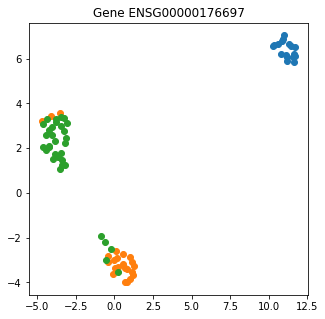

In [123]:
from time import time
import numpy as np
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

cmap = cm.nipy_spectral
dists = pdist(a[gene_indices], metric='euclidean')
Z = linkage(dists, 'ward')
clusters = fcluster(Z, criterion='maxclust', t=3)
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.title(f'Gene {gene}')

markers = ['*','^','o']
wells = np.unique(gene_df.well)
colors = {wells[i] : cmap(i / (max(clusters) + 1)) for i in range(len(wells))}
markers = {i : markers[i - 1] for i in np.unique(clusters)}

for label in np.unique(clusters):
    indices = np.where(clusters == label)[0]
    gene_df.loc[indices,'cluster'] = label
    
for cluster in np.unique(clusters):
    indices = np.where(clusters == cluster)[0]
    plt.scatter(embedding[indices,0], 
                embedding[indices,1])
# ax2 = ax.twinx()
# for w in enumerate(wells):
#     ax2.plot(np.NaN, np.NaN, color=colors[w,
#              label='style ' + str(ss), c='black')
# ax2.get_yaxis().set_visible(False)

# ax.legend(loc=1)
# ax2.legend(loc=3)



# lgnd = plt.legend(frameon=False, scatterpoints=1, fontsize=10)
# lgnd.legendHandles[0]._original_facecolor = 'black'
    
# plt.axis('off')
# plt.tight_layout()


In [ ]:
import torch
import pandas as pd
preds = torch.load('/scr/mdoron/Dino4Cells/results/without-norm-varied-masked-mom-0.996-epoch-100_vit_base_HPA/predictions.pth')
df = pd.read_csv('/scr/mdoron/Dino4Cells/data/fixed_size_masked_single_cells_master.csv')


In [ ]:

df = pd.read_csv('/scr/mdoron/Dino4Cells/data/fixed_size_masked_single_cells_master.csv')

In [9]:
import torch
import pandas as pd
preds = torch.load('/scr/mdoron/Dino4Cells/results/without-norm-varied-masked-mom-0.996-epoch-100_vit_base_HPA/predictions.pth')
df = pd.read_csv('/scr/mdoron/Dino4Cells/data/fixed_size_masked_single_cells_master.csv')

preds = torch.stack(preds).detach().cpu()


In [368]:
targets = torch.load('/scr/mdoron/Dino4Cells//center_momentum_0.98/all_targets.pth')

In [ ]:
(df[sorted(protein_to_num_single_cells.keys())].values.astype(int) == targets.detach().cpu().numpy()).mean()

In [369]:
a = torch.load('/scr/mdoron/Dino4Cells/models/without-norm-varied-masked-mom-0.996-epoch-100_vit_base_HPA/features.pth')

In [11]:
cell_indices = np.where(df.cell_type == 'A549')[0]
cell_preds = preds[cell_indices].detach().cpu()
sig_preds = (torch.sigmoid(cell_preds) > 0.5).int()[:,0,:]

In [380]:
sig_preds.shape

torch.Size([43317, 19])

In [371]:

gene_dict = df.groupby('gene').groups
gene_ind = 8
gene = sorted([(g, len(gene_dict[g])) for g in gene_dict], key=lambda x:x[1])[::-1][gene_ind][0]
# gene = 'ENSG00000176697'
gene

'ENSG00000164749'

In [18]:
from seaborn import clustermap

In [34]:

reducer = umap.UMAP(init='random')
scaled_features = StandardScaler().fit_transform(a[gene_indices])
embedding = reducer.fit_transform(scaled_features)


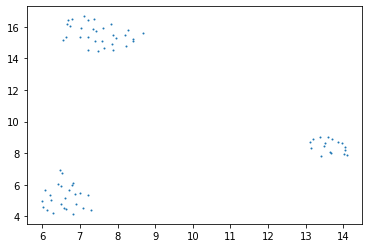

In [38]:
plt.scatter(embedding[:,0],
            embedding[:,1],
            s=1)

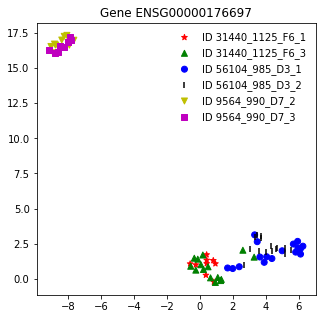

In [143]:
from time import time
import numpy as np
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

cmap = cm.jet

gene_dict = df.groupby('gene').groups
gene_ind = 8
gene = sorted([(g, len(gene_dict[g])) for g in gene_dict], key=lambda x:x[1])[::-1][gene_ind][0]
gene = 'ENSG00000176697'
gene_indices = np.where(df.gene == gene)[0]
gene_df = df.iloc[gene_indices].reset_index()

# reducer = umap.UMAP(init='random')
# scaled_features = StandardScaler().fit_transform(a[gene_indices])
# embedding = reducer.fit_transform(scaled_features)

gene_df['well'] = gene_df.ID
# gene_df['well'] = gene_df.ID.apply(lambda x:x.split('_')[0])

# dists = pdist(embedding, metric='euclidean')
dists = pdist(a[gene_indices], metric='euclidean')
Z = linkage(dists, 'ward')
clusters = fcluster(Z, criterion='maxclust', t=2)

fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.title(f'Gene {gene}')

channels = [0]
markers = ['*','^','o','|','v','s']
wells = np.unique(gene_df.well)
colors = {wells[i] : 'rgbkym'[i] for i in range(len(wells))}
markers = {wells[i] : markers[i] for i in range(len(wells))}
# markers = {i : markers[i - 1] for i in np.unique(clusters)}
# markers = {i : markers[i - 1] for i in np.unique(clusters)}

for label in np.unique(clusters):
    indices = np.where(clusters == label)[0]
    gene_df.loc[indices,'cluster'] = label
    
for cluster in wells:
# for cluster in range(1, max(clusters) + 1):
    indices = np.where(gene_df['well'] == cluster)[0]
    plt.scatter(embedding[indices,0], 
                embedding[indices,1],
                marker=markers[cluster],
                c=[colors[i] for i in gene_df.iloc[indices].well],
               label=f'ID {cluster}')

# ax2 = ax.twinx()
# # for w in wells:
# #     ax2.scatter(np.NaN, np.NaN, color=colors[w], label=f'Plate {w}', marker = 'o')
# ax2.get_yaxis().set_visible(False)

lgnd = ax.legend(frameon=False, scatterpoints=1, fontsize=10, loc='upper right')
# for h in lgnd.legendHandles:
#     h._original_facecolor = 'black'
ax2.legend(frameon=False, loc='lower right')


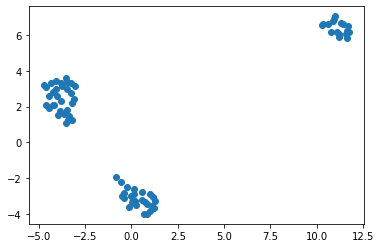

In [125]:
plt.scatter(embedding[:,0], embedding[:,1])

/scr/mdoron/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


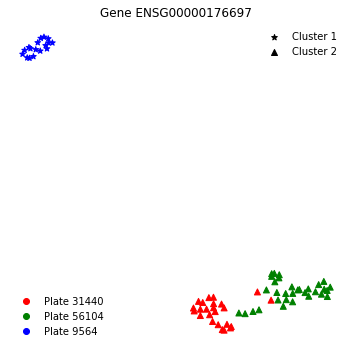

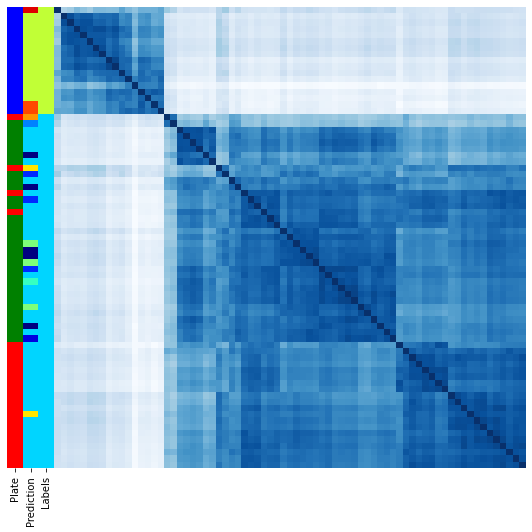

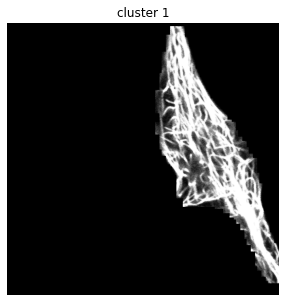

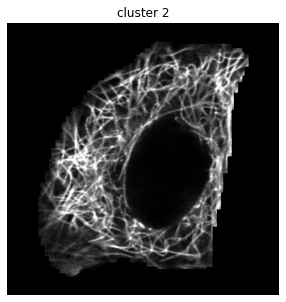

In [146]:
# from time import time
# import numpy as np
# from matplotlib import pyplot as plt
# from sklearn import manifold, datasets
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# from scipy.spatial.distance import pdist

cmap = cm.jet

gene_dict = df.groupby('gene').groups
gene_ind = 8
gene = sorted([(g, len(gene_dict[g])) for g in gene_dict], key=lambda x:x[1])[::-1][gene_ind][0]
gene = 'ENSG00000176697'
gene_indices = np.where(df.gene == gene)[0]
gene_df = df.iloc[gene_indices].reset_index()

# reducer = umap.UMAP(init='random')
# scaled_features = StandardScaler().fit_transform(a[gene_indices])
# embedding = reducer.fit_transform(scaled_features)

# gene_df['well'] = gene_df.ID
gene_df['well'] = gene_df.ID.apply(lambda x:x.split('_')[0])

# dists = pdist(embedding, metric='euclidean')
dists = pdist(a[gene_indices], metric='euclidean')
Z = linkage(dists, 'ward')
clusters = fcluster(Z, criterion='maxclust', t=2)

fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.title(f'Gene {gene}')

channels = [0]
markers = ['*','^','o','|','v','s']
wells = np.unique(gene_df.well)
colors = {wells[i] : 'rgb'[i] for i in range(len(wells))}
markers = {i : markers[i - 1] for i in np.unique(clusters)}

for label in np.unique(clusters):
    indices = np.where(clusters == label)[0]
    gene_df.loc[indices,'cluster'] = label
    
for cluster in range(1, max(clusters) + 1):
    indices = np.where(clusters == cluster)[0]
    plt.scatter(embedding[indices,0], 
                embedding[indices,1],
                marker=markers[cluster],
                c=[colors[i] for i in gene_df.iloc[indices].well],
               label=f'Cluster {cluster}')

ax2 = ax.twinx()
for w in wells:
    ax2.scatter(np.NaN, np.NaN, color=colors[w], label=f'Plate {w}', marker = 'o')
ax2.get_yaxis().set_visible(False)

lgnd = ax.legend(frameon=False, scatterpoints=1, fontsize=10, loc='upper right')
for h in lgnd.legendHandles:
    h._original_facecolor = 'black'
ax2.legend(frameon=False, loc='lower left')

ax.axis('off')
ax2.axis('off')
plt.tight_layout()

lut = dict(zip(gene_df['well'].unique(), 'rgbk'))
row_colors1 = gene_df['well'].map(lut)
row_colors1.name = 'Plate'

b = ((cell_preds[gene_indices])).astype(int)
c1 = [str(list(i)) for i in b]
series = pd.DataFrame(c1)[0]
series.name = 'Prediction'

lut1 = dict(zip(np.unique(c1), [cmap(i / len(np.unique(c1))) for i in range(len(np.unique(c1)))]))
row_colors2 = series.map(lut1)

b = ((targets[cell_indices][gene_indices])).astype(int)
c2 = [str(list(i)) for i in b]
# lut2 = dict(zip(np.unique(c2), [cmap(i / len(np.unique(c2))) for i in range(len(np.unique(c2)))]))
series = pd.DataFrame(c2)[0]
series.name = 'Labels'
row_colors3 = series.map(lut1)

row_colors = pd.concat([row_colors1,row_colors2,row_colors3],axis=1)

c = clustermap(pd.DataFrame(squareform(dists)),
               figsize=(7.5,7.5),
               cbar_pos=None, 
               xticklabels=[], 
               yticklabels=[], 
               cmap='Blues_r', 
               dendrogram_ratio=[0,0],
               col_cluster=True,
               row_cluster=True,
               row_colors = row_colors,
               cbar_kws={"size": 20}
)
# c.ax_row_colors.set_xlabel('Well', fontsize=18, rotation=90)

for cluster in np.unique(clusters):
    plt.figure(figsize=(5,5))
    plt.imshow(io.imread(gene_df[(gene_df.cluster == cluster)].file.iloc[0])[:,:,channels], cmap='Greys_r', vmin=0, vmax=255)
    plt.grid(None)
    plt.axis('off')
    plt.title(f'cluster {cluster}')


In [423]:
b = ((cell_preds[gene_indices])).astype(int)
c = [str(list(i)) for i in b]
series = pd.DataFrame(c)[0]
series.name = 'Prediction'


In [136]:
from time import time
import numpy as np
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

cmap = cm.nipy_spectral
dists = pdist(a[gene_indices], metric='euclidean')
Z = linkage(dists, 'ward')
clusters = fcluster(Z, criterion='maxclust', t=3)
for label in np.unique(clusters):
    indices = np.where(clusters == label)[0]
    gene_df.loc[indices,'cluster'] = label
    

/scr/mdoron/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


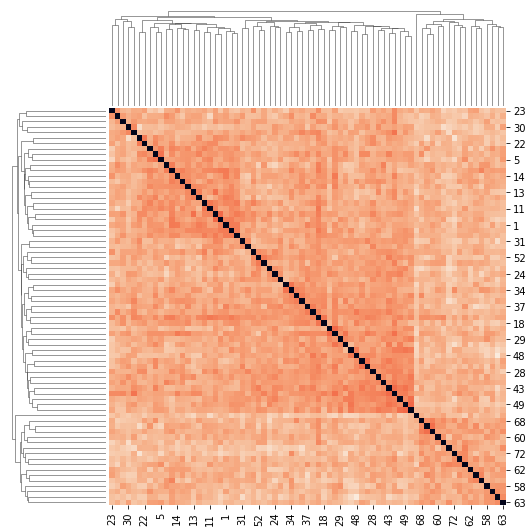

In [137]:
c = clustermap(pd.DataFrame(squareform(dists)),
               figsize=(7.5,7.5),
               cbar_pos=None, 

)

In [ ]:
from time import time
import numpy as np
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

cmap = cm.nipy_spectral
dists = pdist(a[gene_indices], metric='euclidean')
Z = linkage(dists, 'ward')
clusters = fcluster(Z, criterion='maxclust', t=3)
for label in np.unique(clusters):
    indices = np.where(clusters == label)[0]
    gene_df.loc[indices,'cluster'] = label
    

In [21]:
from scipy.spatial.distance import squareform
# fig,ax = plt.subplots(1,1,figsize=(5,5))
# dn = dendrogram(Z)
# plt.axis('off')


In [ ]:
plt.imshow(squareform(dists)[dn['leaves'], :][:,dn['leaves']], cmap='gray')

In [99]:
s = squareform(dists)


In [101]:
s

array([[ 0.        , 49.29323744, 49.44469319, ..., 52.92023267,
        54.32782157, 55.23229304],
       [49.29323744,  0.        , 49.50062568, ..., 50.18457188,
        54.513504  , 57.70564069],
       [49.44469319, 49.50062568,  0.        , ..., 54.42523114,
        52.43601357, 54.89399549],
       ...,
       [52.92023267, 50.18457188, 54.42523114, ...,  0.        ,
        49.80620949, 52.29596518],
       [54.32782157, 54.513504  , 52.43601357, ..., 49.80620949,
         0.        , 53.39445768],
       [55.23229304, 57.70564069, 54.89399549, ..., 52.29596518,
        53.39445768,  0.        ]])

In [98]:
for i in range(d.shape[0]):
    s[i,i]=0

(73, 73)

/scr/mdoron/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 60.00000000000006, 'Well')

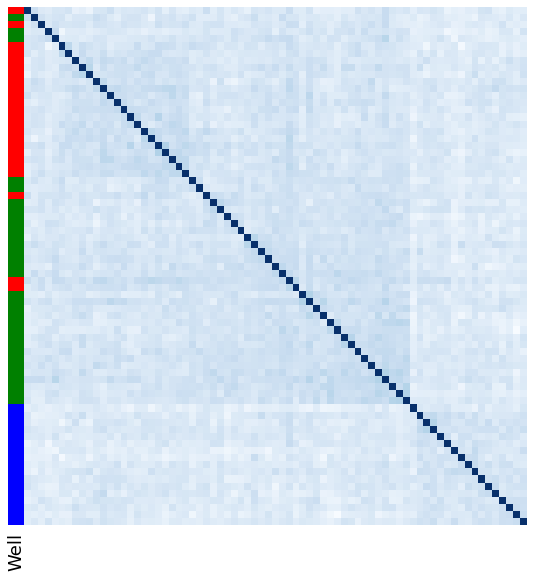

In [95]:
lut = dict(zip(gene_df['well'].unique(), 'rgb'))
row_colors = gene_df['well'].map(lut)

c = clustermap(pd.DataFrame(squareform(dists)),
               figsize=(7.5,7.5),
               cbar_pos=None, 
               xticklabels=[], 
               yticklabels=[], 
               cmap='Blues_r', 
               dendrogram_ratio=[0,0],
               col_cluster=True,
               row_cluster=True,
               row_colors = row_colors.to_numpy(),
               cbar_kws={"size": 20}
)
c.ax_row_colors.set_xlabel('Well', fontsize=18, rotation=90)

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(io.imread(gene_df[(gene_df.cluster == 3) & (gene_df.well == '31440')].file.iloc[0])[:,:,channels], cmap='Greys_r', vmin=0, vmax=255)
plt.grid(None)
plt.axis('off')

plt.figure(figsize=(5,5))
plt.imshow(io.imread(gene_df[(gene_df.cluster == 3) & (gene_df.well == '31440')].file.iloc[1])[:,:,channels], cmap='Greys_r', vmin=0, vmax=255)
plt.grid(None)
plt.axis('off')

plt.figure(figsize=(5,5))
plt.imshow(io.imread(gene_df[(gene_df.cluster == 3) & (gene_df.well == '31440')].file.iloc[2])[:,:,channels], cmap='Greys_r', vmin=0, vmax=255)
plt.grid(None)
plt.axis('off')

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(io.imread(gene_df[(gene_df.cluster == 3) & (gene_df.well == '56104')].file.iloc[0])[:,:,channels], cmap='Greys_r', vmin=0, vmax=255)
plt.grid(None)
plt.axis('off')

plt.figure(figsize=(5,5))
plt.imshow(io.imread(gene_df[(gene_df.cluster == 3) & (gene_df.well == '56104')].file.iloc[1])[:,:,channels], cmap='Greys_r', vmin=0, vmax=255)
plt.grid(None)
plt.axis('off')

plt.figure(figsize=(5,5))
plt.imshow(io.imread(gene_df[(gene_df.cluster == 3) & (gene_df.well == '56104')].file.iloc[2])[:,:,channels], cmap='Greys_r', vmin=0, vmax=255)
plt.grid(None)
plt.axis('off')


In [ ]:
plt.figure(figsize=(2.5,2.5))
plt.imshow(io.imread(gene_df[(gene_df.cluster == 1) & (gene_df.well == '9564')].file.iloc[4])[:,:,channels], cmap='Greys_r', vmin=0, vmax=255)
plt.grid(None)
plt.axis('off')

In [ ]:
plt.figure(figsize=(2.5,2.5))
plt.imshow(io.imread(gene_df[(gene_df.cluster == 3) & (gene_df.well == '31440')].file.iloc[0])[:,:,channels], cmap='Greys_r', vmin=0, vmax=255)
plt.grid(None)
plt.axis('off')
plt.figure(figsize=(2.5,2.5))
plt.imshow(io.imread(gene_df[(gene_df.cluster == 3) & (gene_df.well == '31440')].file.iloc[1])[:,:,channels], cmap='Greys_r', vmin=0, vmax=255)
plt.grid(None)
plt.axis('off')
plt.figure(figsize=(2.5,2.5))
plt.imshow(io.imread(gene_df[(gene_df.cluster == 3) & (gene_df.well == '31440')].file.iloc[2])[:,:,channels], cmap='Greys_r', vmin=0, vmax=255)
plt.grid(None)
plt.axis('off')

In [ ]:
gene_df.well.unique()

In [ ]:
plt.figure(figsize=(2.5,2.5))
plt.imshow(io.imread(gene_df[(gene_df.cluster == 3) & (gene_df.well == '56104')].file.iloc[0])[:,:,channels], cmap='Greys_r', vmin=0, vmax=255)
plt.grid(None)
plt.axis('off')
plt.figure(figsize=(2.5,2.5))
plt.imshow(io.imread(gene_df[(gene_df.cluster == 3) & (gene_df.well == '56104')].file.iloc[1])[:,:,channels], cmap='Greys_r', vmin=0, vmax=255)
plt.grid(None)
plt.axis('off')
plt.figure(figsize=(2.5,2.5))
plt.imshow(io.imread(gene_df[(gene_df.cluster == 3) & (gene_df.well == '56104')].file.iloc[2])[:,:,channels], cmap='Greys_r', vmin=0, vmax=255)
plt.grid(None)
plt.axis('off')

In [14]:
import torch
import pandas as pd
preds = torch.load('/scr/mdoron/Dino4Cells/results/without-norm-varied-masked-mom-0.996-epoch-100_vit_base_HPA/predictions.pth')
preds = torch.stack(preds)
preds = (torch.sigmoid(preds) > 0.5).int().detach().cpu().numpy()
targets = torch.load('/scr/mdoron/Dino4Cells/results/without-norm-varied-masked-mom-0.996-epoch-100_vit_base_HPA/all_targets.pth')
targets = torch.stack(targets).detach().cpu().numpy()
df = pd.read_csv('/scr/mdoron/Dino4Cells/data/fixed_size_masked_single_cells_master.csv')
preds = preds[:,0,:]

cell_indices = np.where(df.cell_type == 'A549')[0]
cell_preds = preds[cell_indices]
sig_preds = np.array((torch.sigmoid(torch.Tensor(cell_preds)) > 0.5).int()[:,:])



In [3]:
valid_IDs = torch.load('/scr/mdoron/Dino4Cells/data/valid_IDs.pth')

In [143]:
import numpy as np
valid_indices = np.where(df.ID.isin(valid_IDs))[0]

In [144]:
single_label_indices = np.where((preds[valid_indices].sum(axis=1) == 1) & (targets[valid_indices].sum(axis=1) == 1))[0]

In [145]:
from label_dict import protein_to_num_single_cells
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
target_labels = sorted(protein_to_num_single_cells.keys())


([<matplotlib.axis.YTick at 0x7f72bb1749a0>,
 [Text(0, 0, 'Actin filaments'),
  Text(0, 1, 'Aggresome'),
  Text(0, 2, 'Centrosome'),
  Text(0, 3, 'Cytosol'),
  Text(0, 4, 'Endoplasmic reticulum'),
  Text(0, 5, 'Golgi apparatus'),
  Text(0, 6, 'Intermediate filaments'),
  Text(0, 7, 'Microtubules'),
  Text(0, 8, 'Mitochondria'),
  Text(0, 9, 'Mitotic spindle'),
  Text(0, 10, 'Negative'),
  Text(0, 11, 'Nuclear bodies'),
  Text(0, 12, 'Nuclear membrane'),
  Text(0, 13, 'Nuclear speckles'),
  Text(0, 14, 'Nucleoli'),
  Text(0, 15, 'Nucleoli fibrillar center'),
  Text(0, 16, 'Nucleoplasm'),
  Text(0, 17, 'Plasma membrane'),
  Text(0, 18, 'Vesicle')])

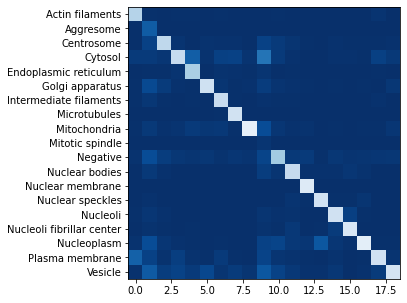

In [156]:
mat = confusion_matrix(np.where(targets[valid_indices][single_label_indices])[1], 
                 np.where(preds[valid_indices][single_label_indices])[1],
                 normalize='pred')
plt.figure(figsize=(5,5))
plt.imshow(mat, vmin=0, vmax=1, cmap='Blues_r')
plt.yticks(range(19), np.array(target_labels))
# plt.xticks(range(19), np.array(target_labels), rotation=90)


In [153]:
l = zip(list(protein_to_num_single_cells.keys()), ['Nucleoplasm',
'Nuclear membrane',
'Nucleoli',
'Nucleoli fibrillar center',
'Nuclear speckles',
'Nuclear bodies',
'Endoplasmic reticulum',
'Golgi apparatus',
'Intermediate filaments',
'Actin filaments',
'Microtubules',
'Mitotic spindle',
'Centrosome',
'Plasma membrane',
'Mitochondria',
'Aggresome',
'Cytosol',
'Vesicle',
'Negative'])

In [154]:
target_labels = np.array(sorted(l, key=lambda x:x[1]))[:,1]

In [149]:
target_labels[-1] = 'vesicles,peroxisomes,\nendosomes,lysosomes,\nlipid droplets,cytoplasmic bodies'

In [150]:
target_labels

array(['Actin filaments', 'Aggresome', 'Centrosome', 'Cytosol',
       'Endoplasmic reticulum', 'Golgi apparatus',
       'Intermediate filaments', 'Microtubules', 'Mitochondria',
       'Mitotic spindle', 'Negative', 'Nuclear bodies',
       'Nuclear membrane', 'Nuclear speckles', 'Nucleoli',
       'Nucleoli fibrillar center', 'Nucleoplasm', 'Plasma membrane',
       'vesicles,peroxisomes,\nendosomes,lysosomes,\nlipid droplets,cytoplasmic bodi'],
      dtype='<U74')

In [439]:
import yaml
import vision_transformer as vits

config = yaml.safe_load(open('/scr/mdoron/Dino4Cells/configs/config_varied_masked_no_norm_vit_base_HPA.yaml', "r"))

model = vits.__dict__[config["model"]["arch"]](
    img_size=[config["embedding"]["image_size"]],
    patch_size=config["model"]["patch_size"],
    drop_path_rate=0.1,  # stochastic depth
    in_chans=config["model"]["num_channels"],
)
import pandas as pd
df = pd.read_csv('/scr/mdoron/Dino4Cells/data/fixed_size_masked_single_cells_master.csv').sample(frac=1)
images_paths = [df.file.iloc[i] for i in range(10)]


In [89]:
def get_all_attentions(model, x, n=1):
    x = model.prepare_tokens(x)
    # we return the output tokens from the `n` last blocks
    output = []
    for i, blk in enumerate(model.blocks):
        att = blk(x, return_attention=True)
        x = blk(x)
        if len(model.blocks) - i <= n:
            output.append(att)
    return output

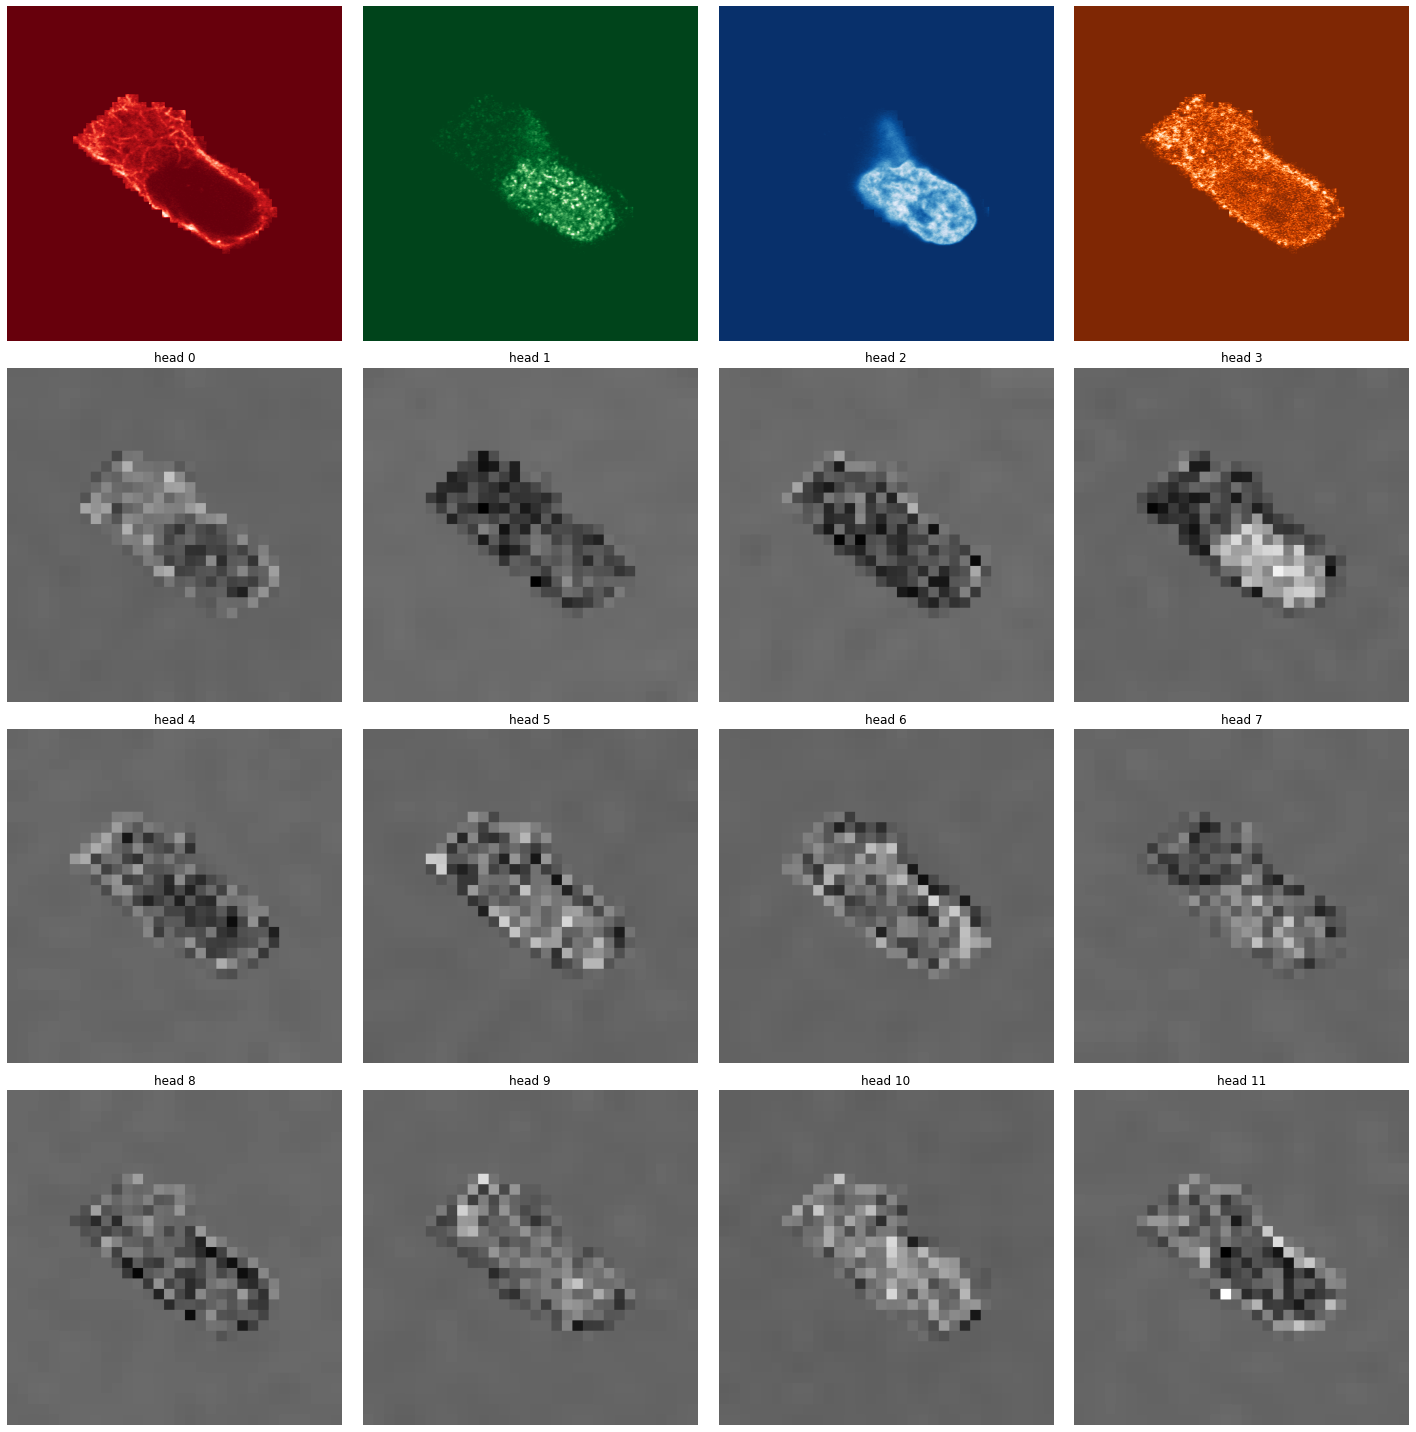

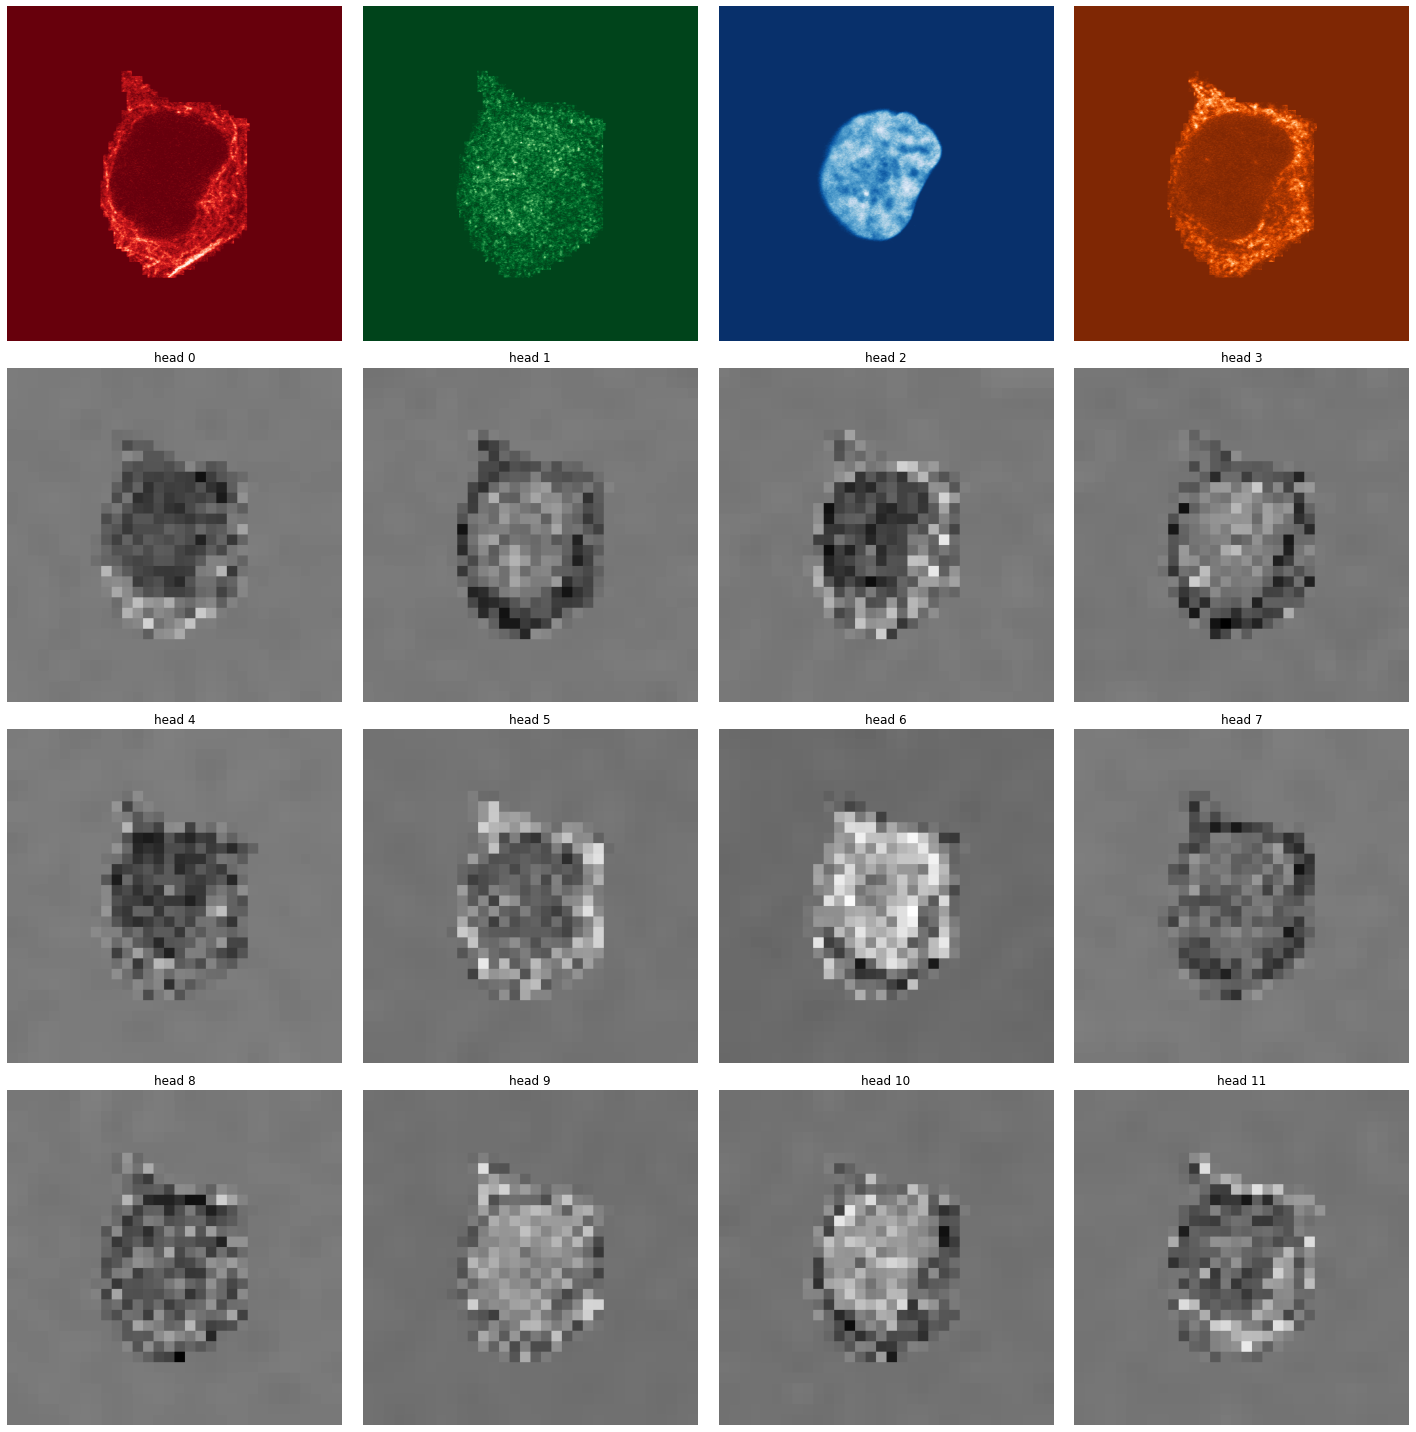

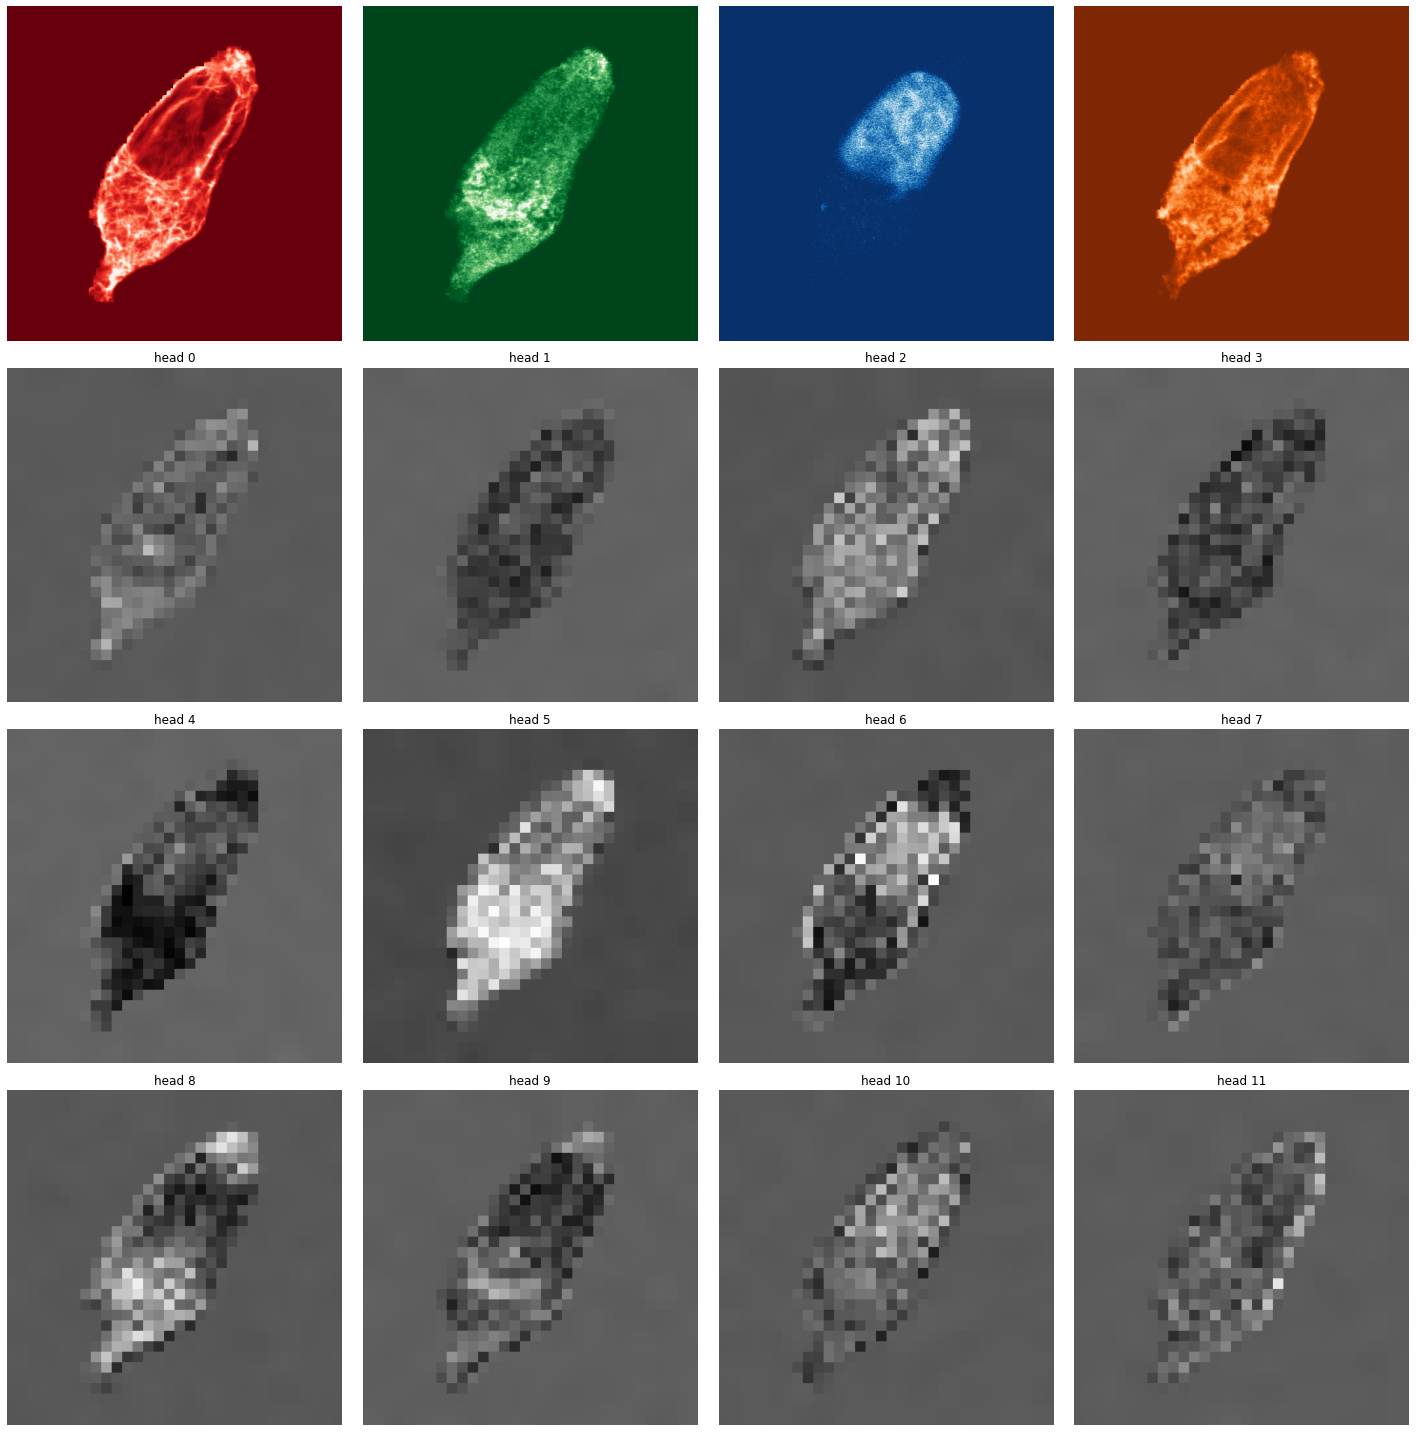

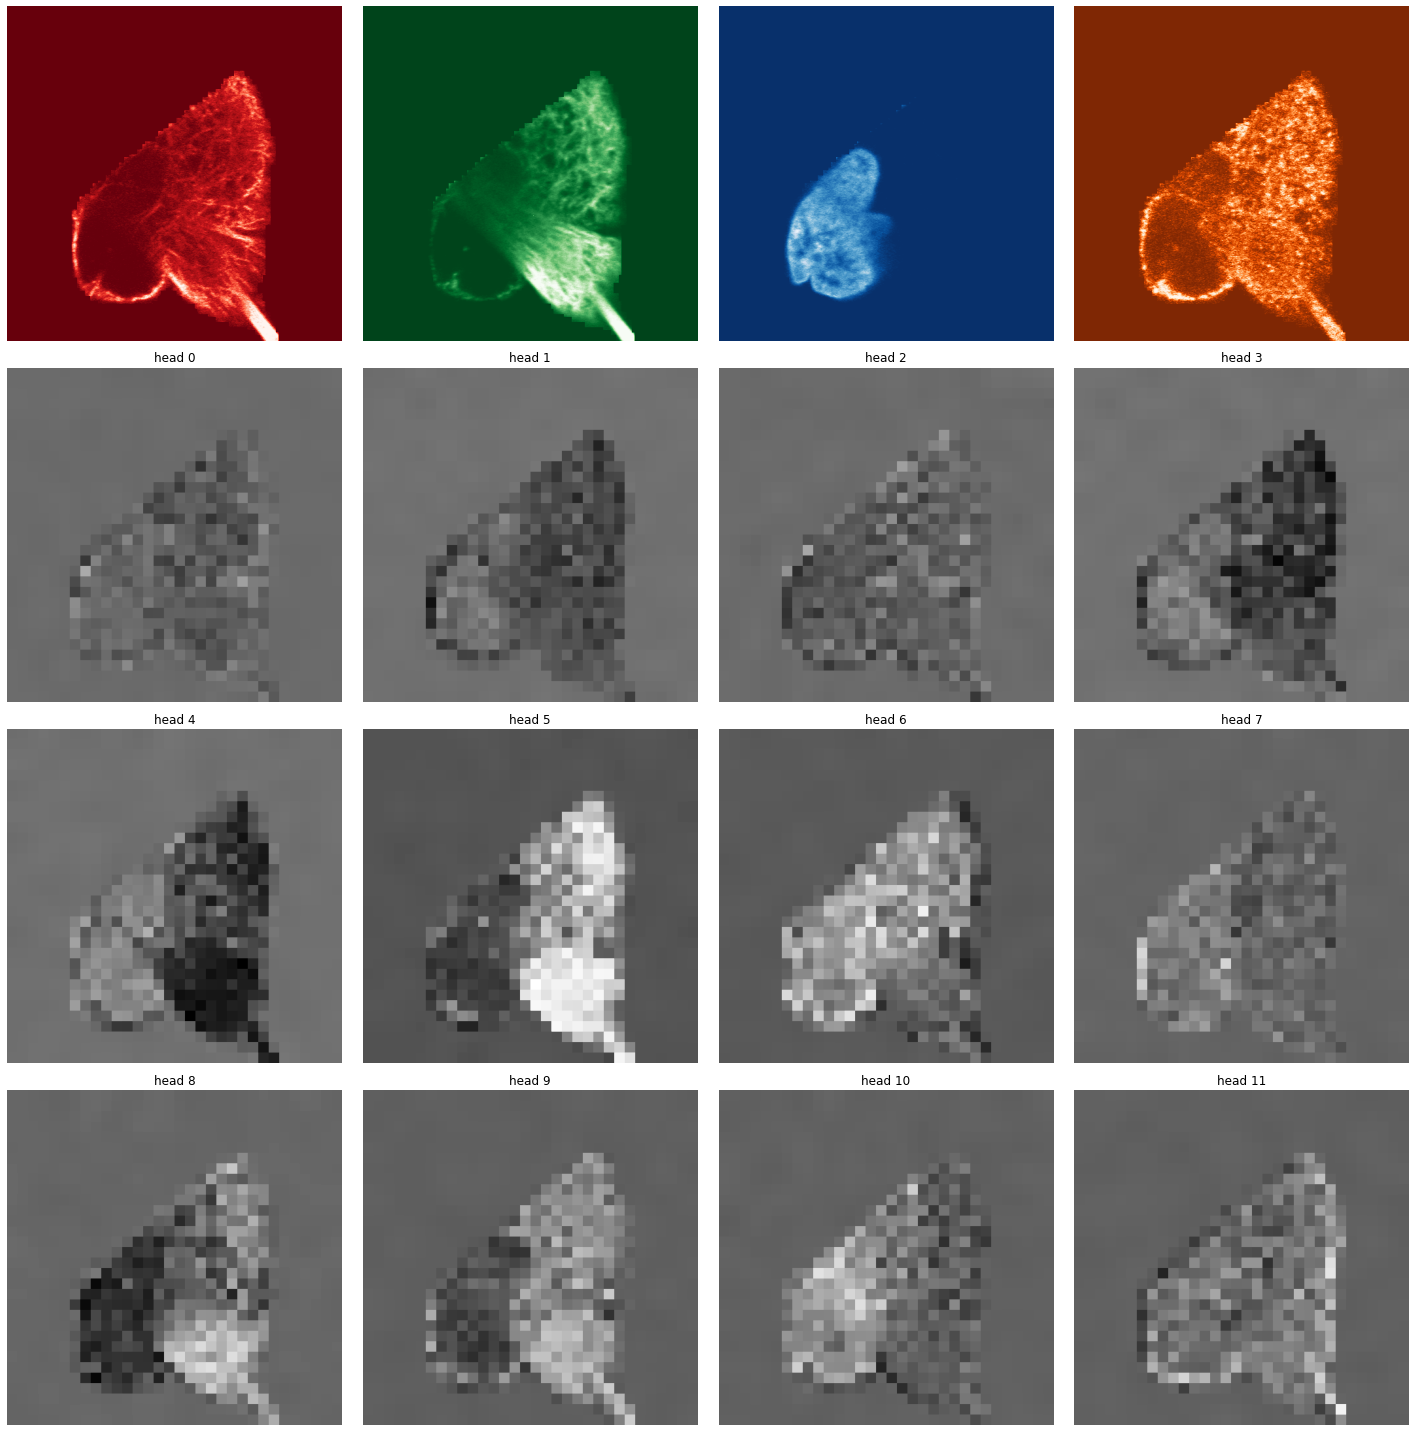

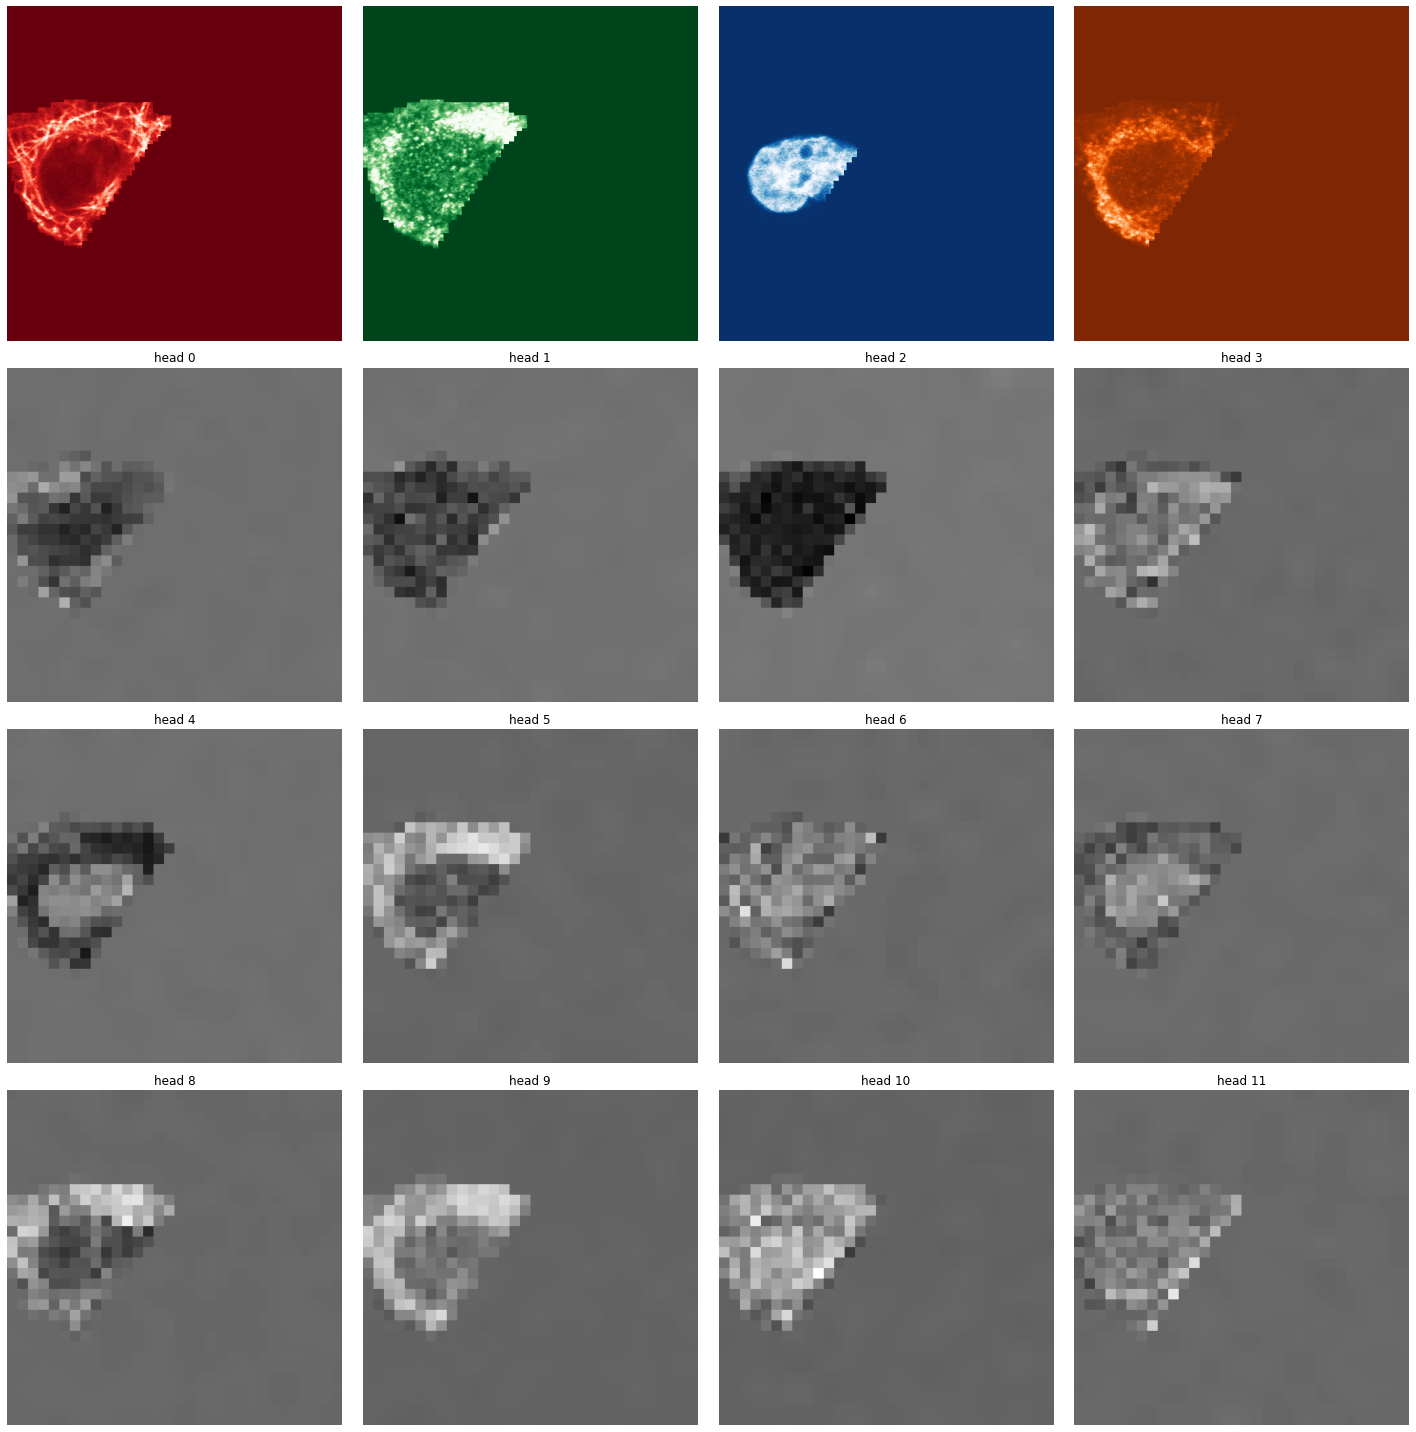

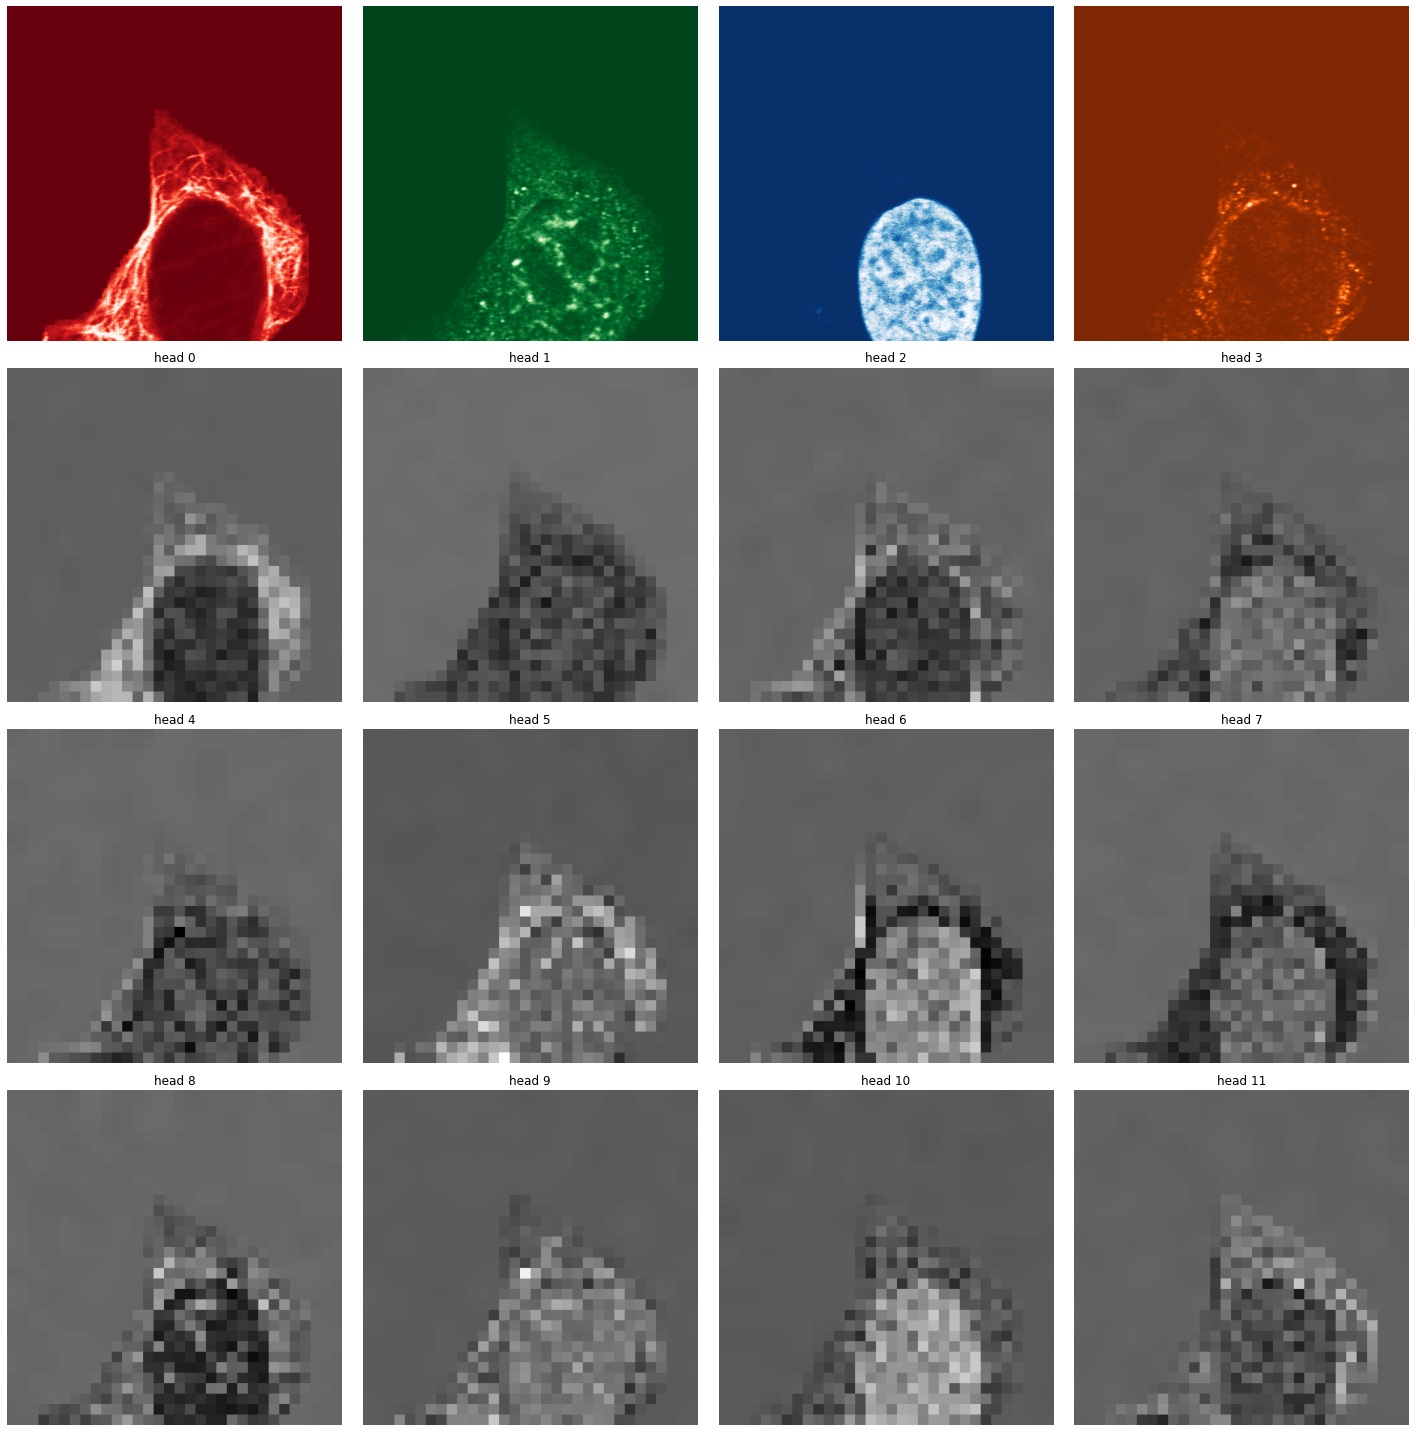

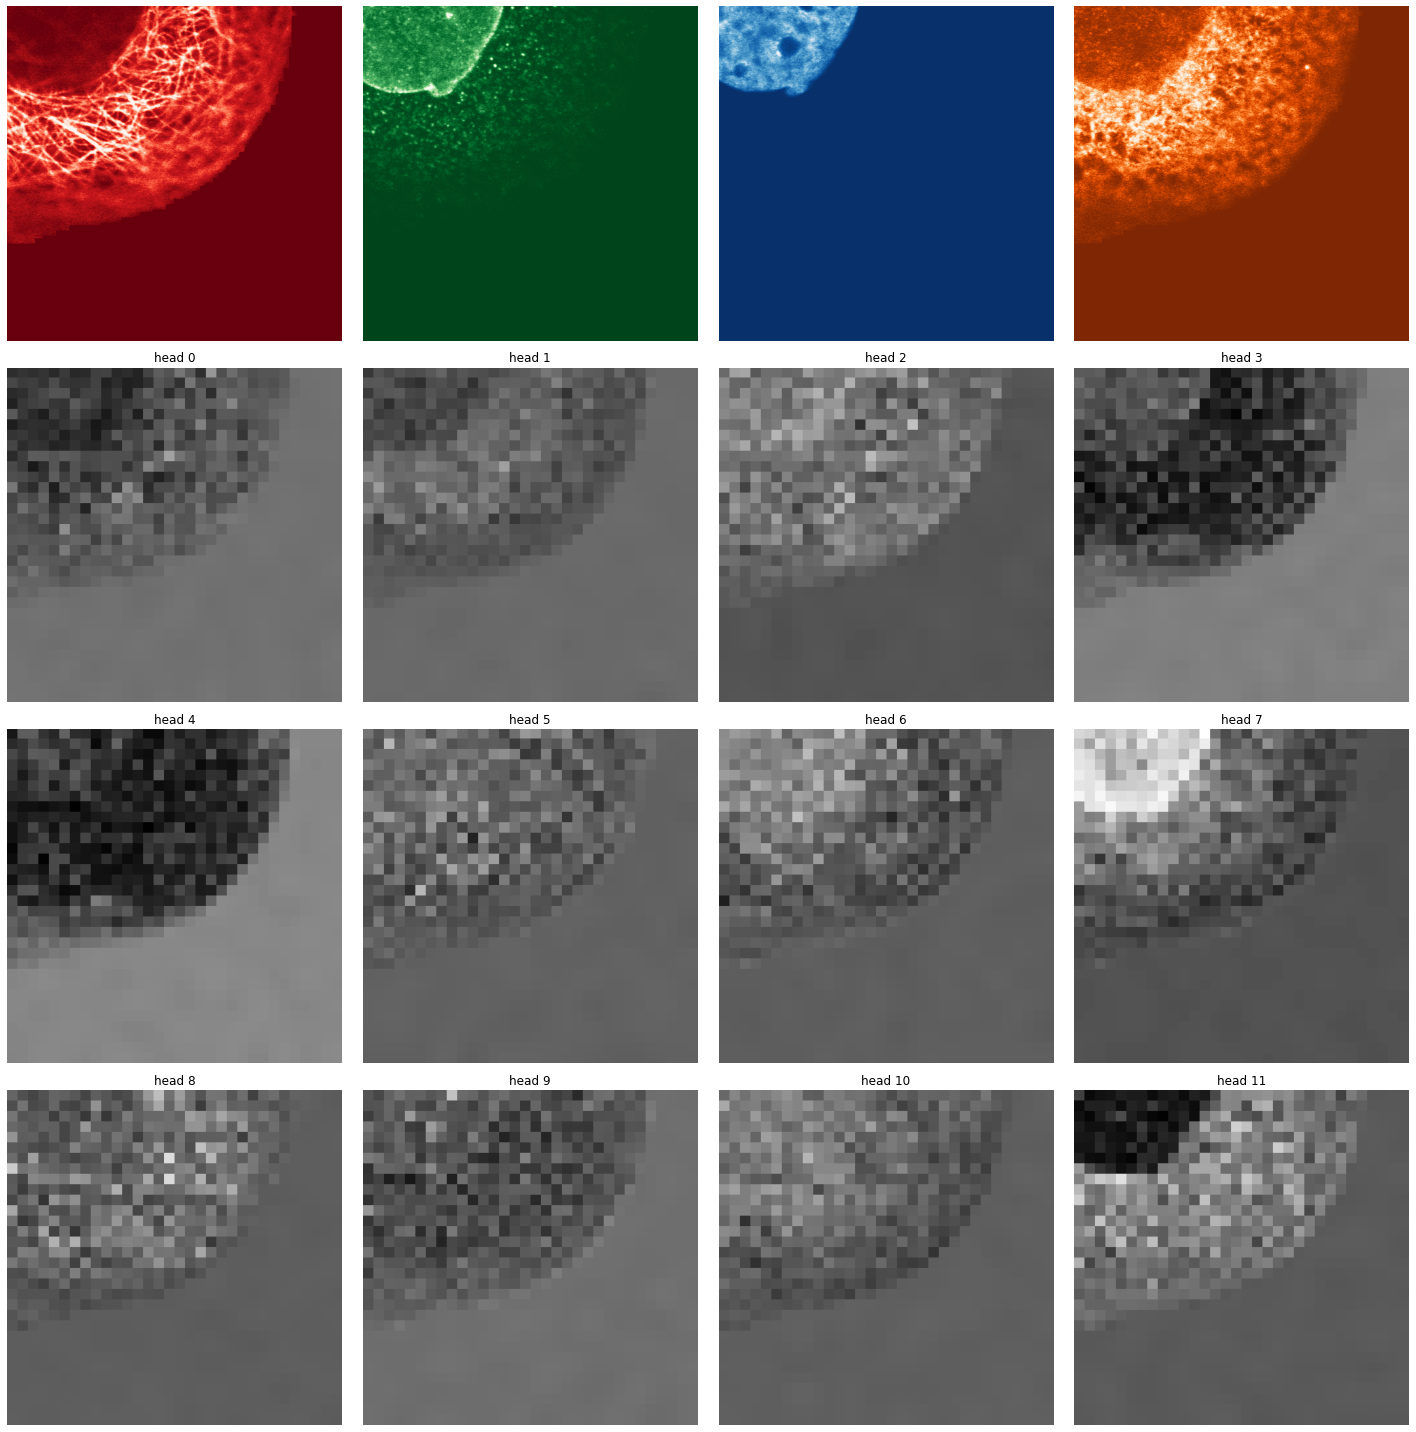

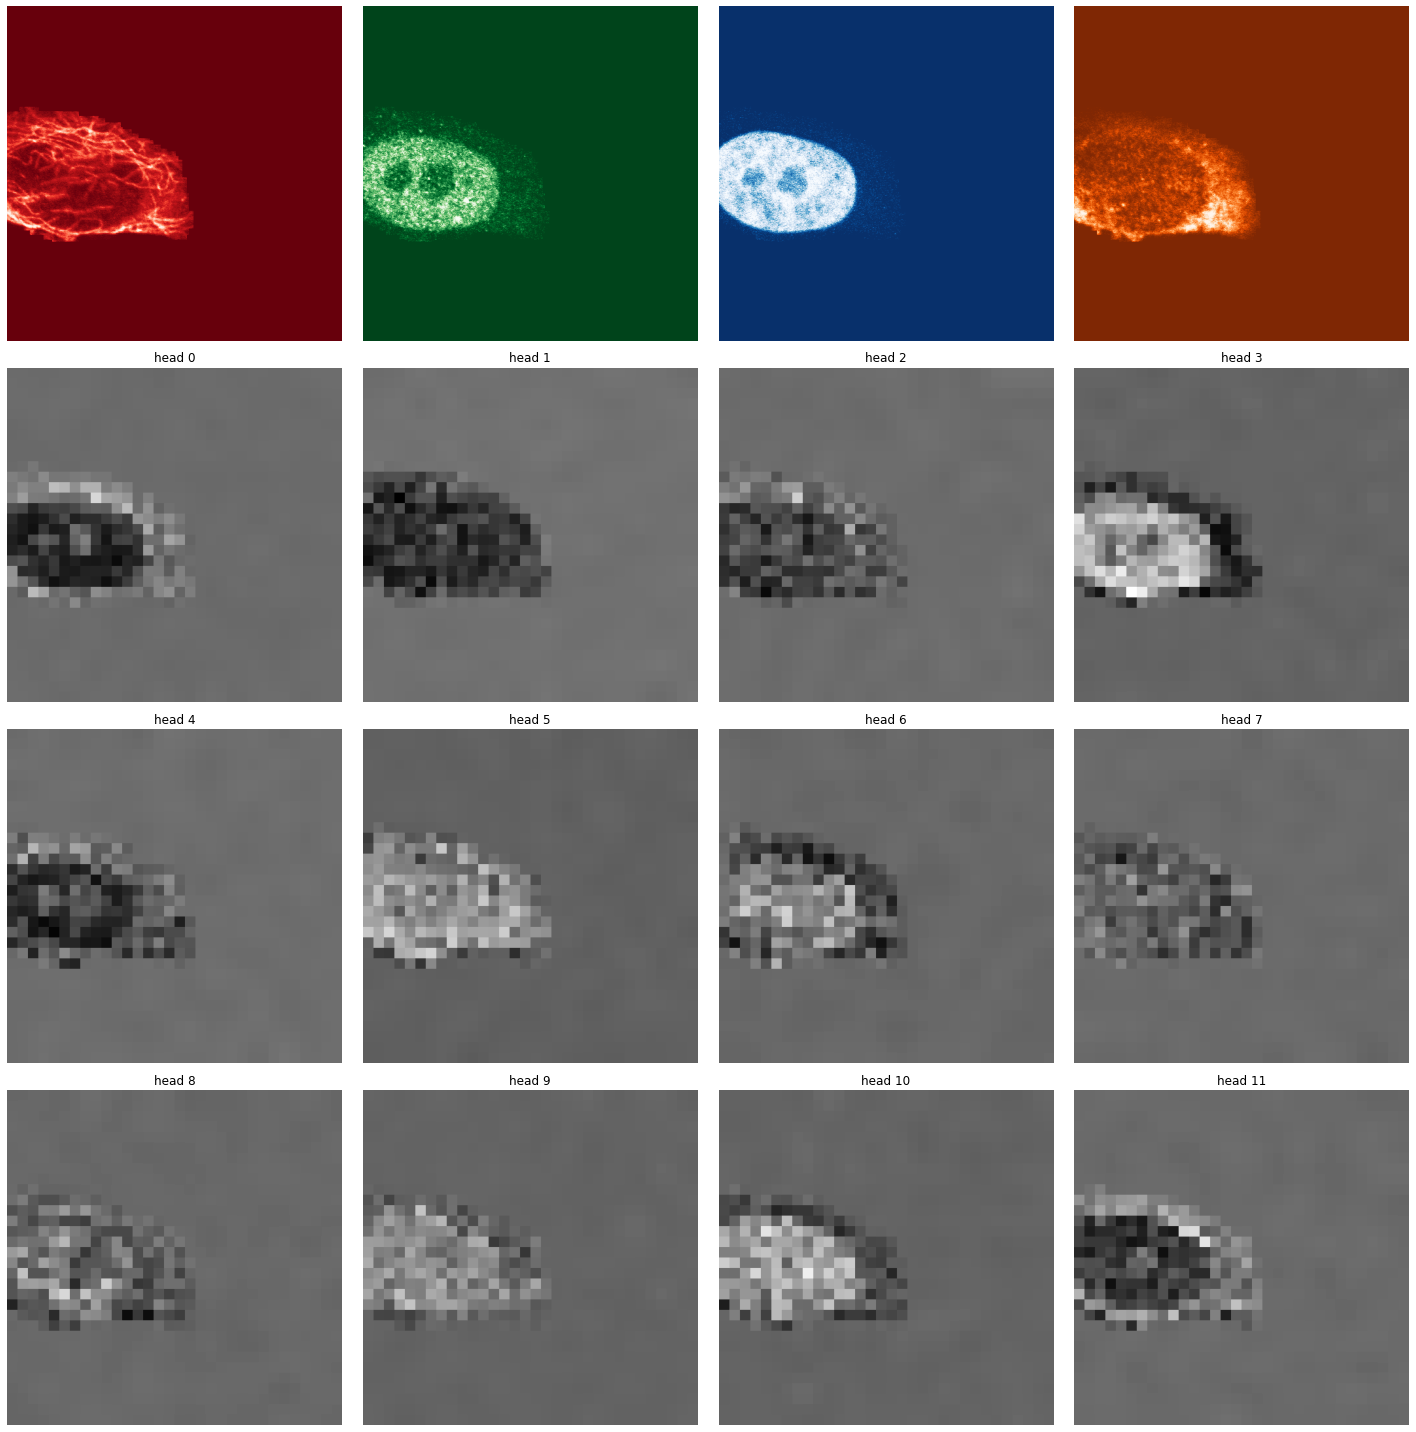

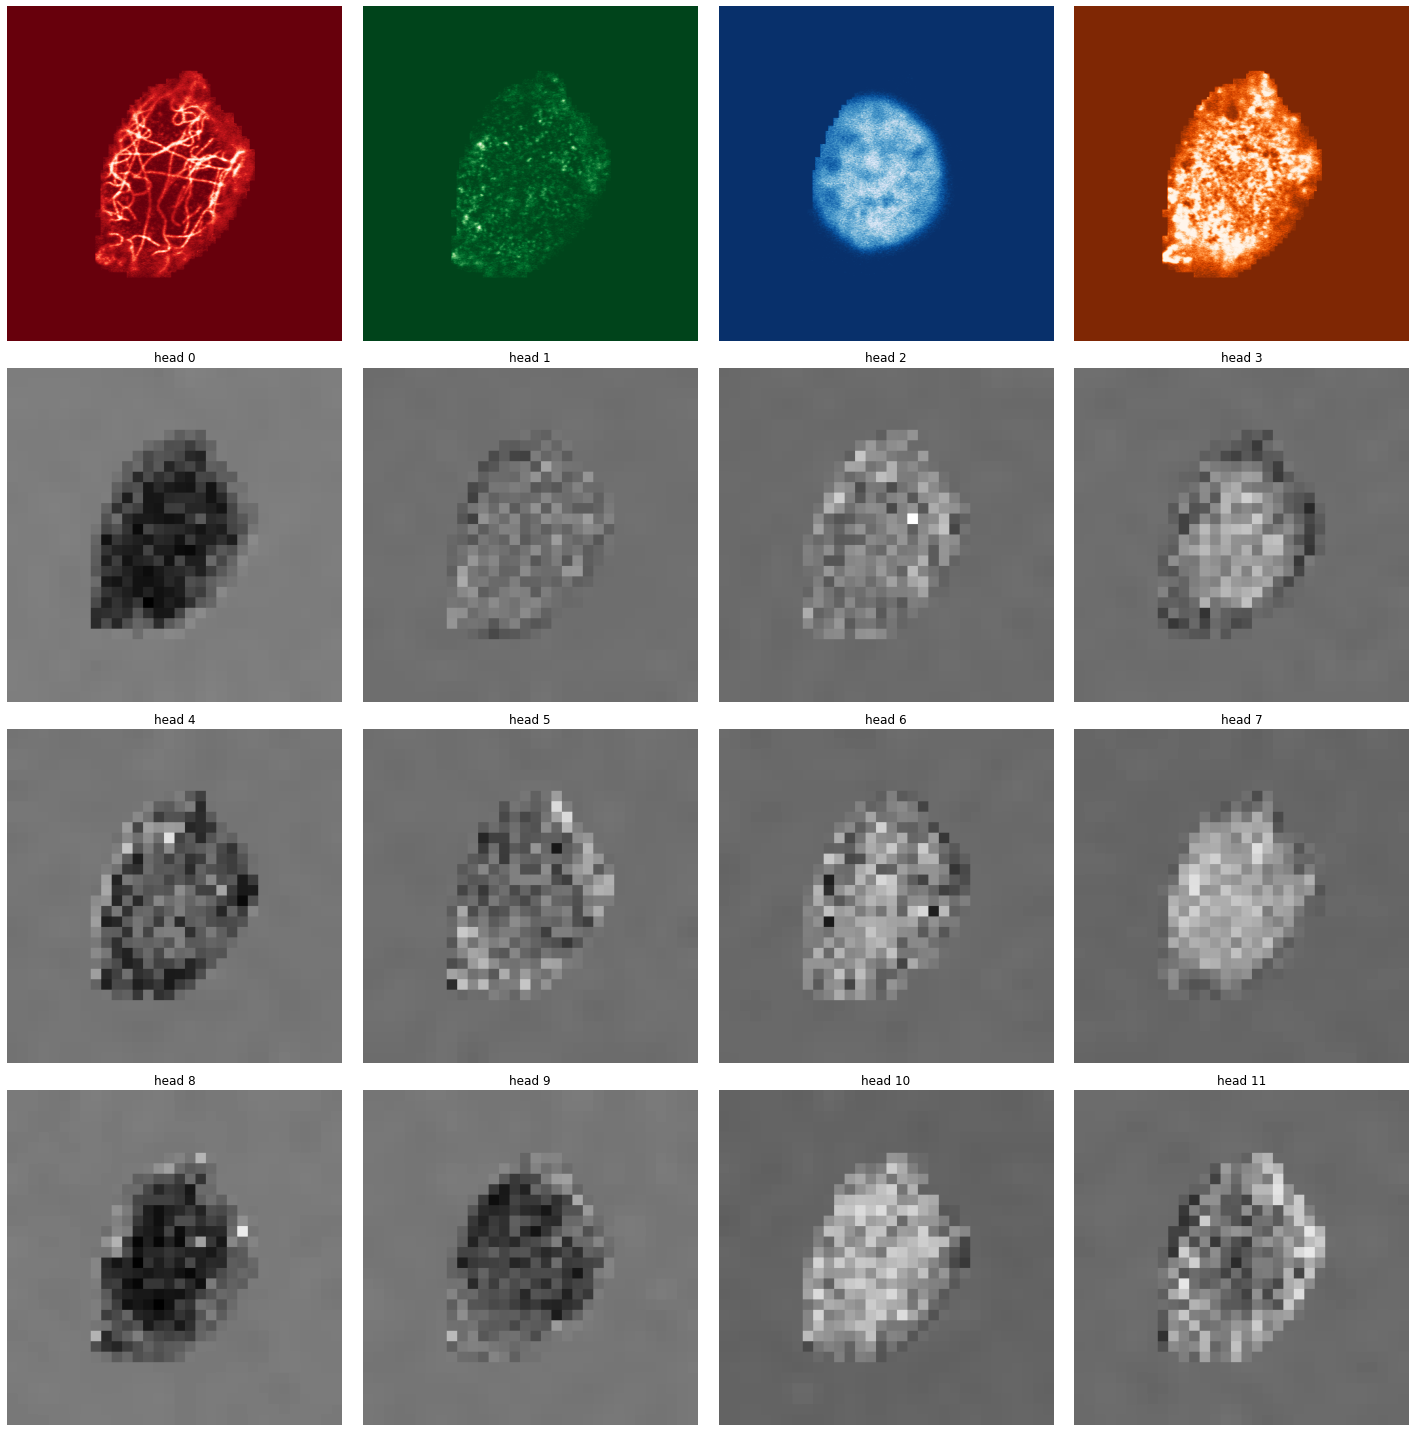

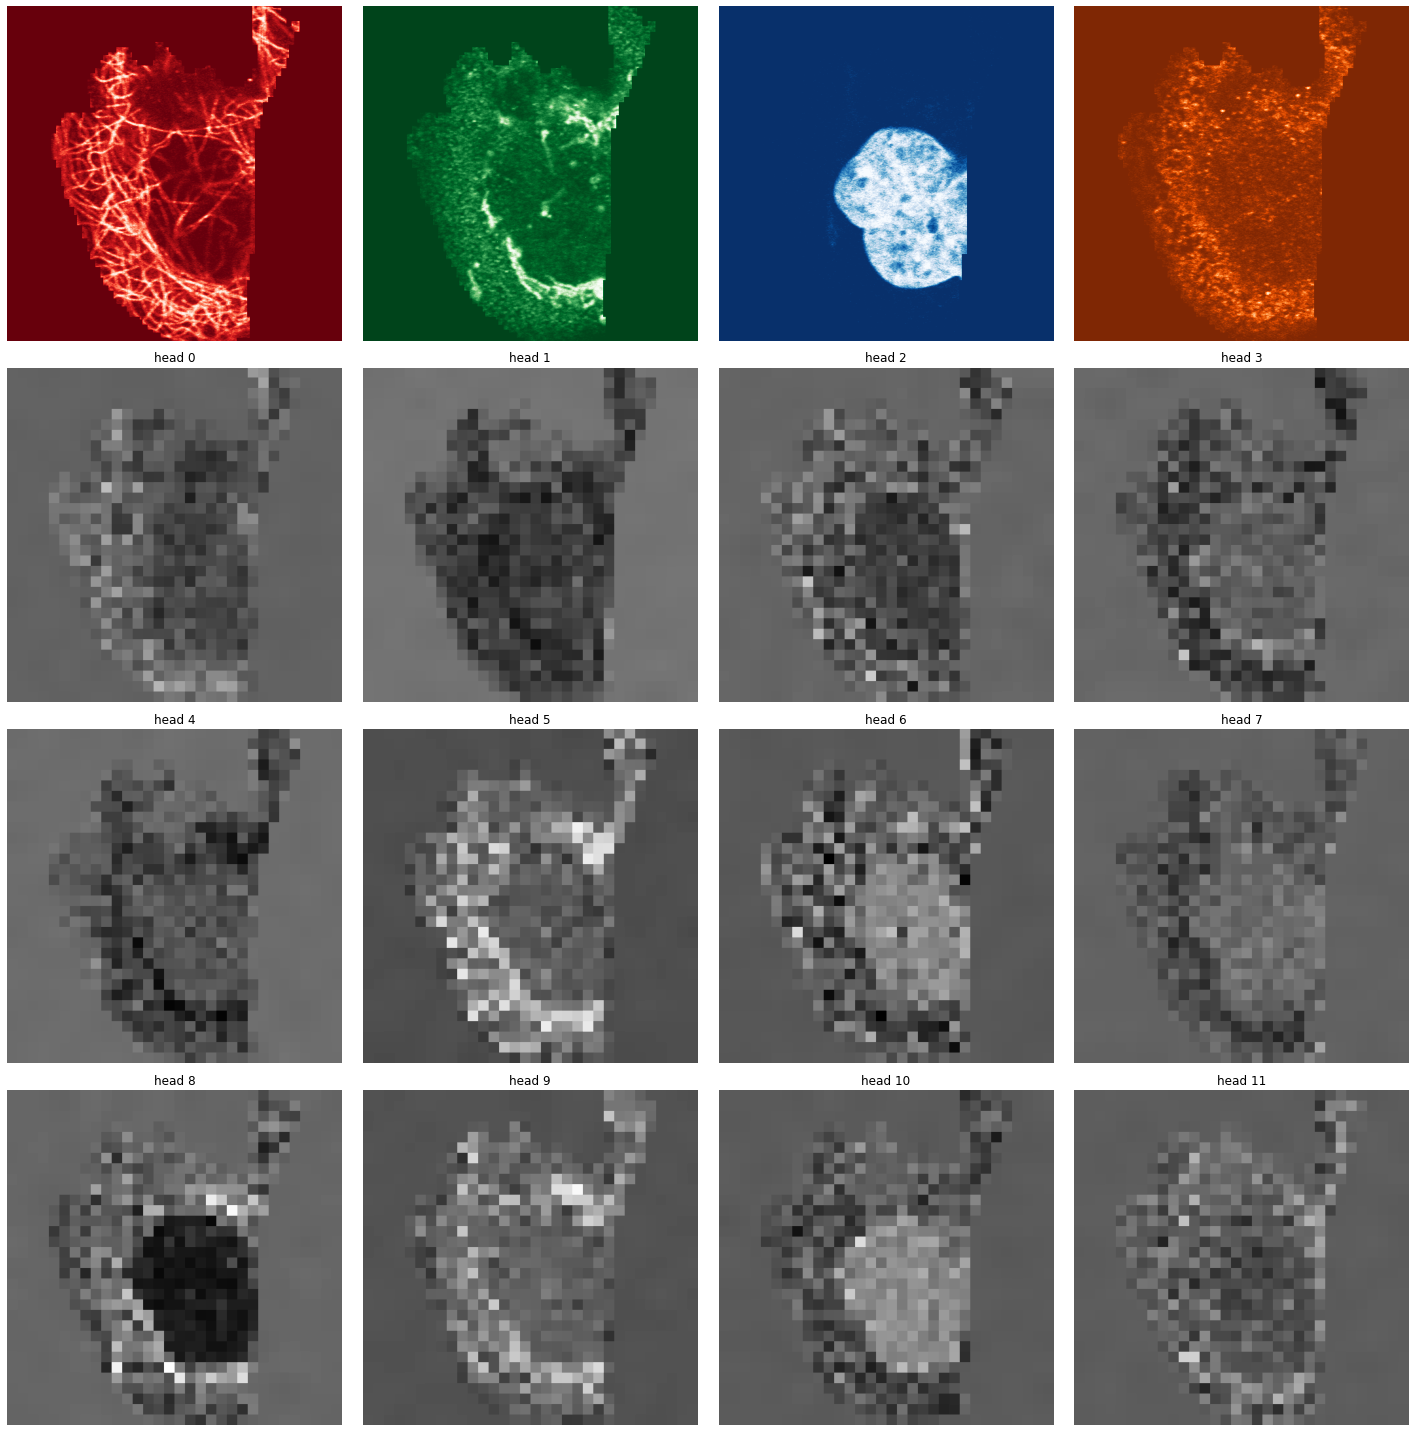

In [364]:
from skimage import io
import torchvision
from torch import nn
from utils import Normalize
from torchvision import transforms

t = torchvision.transforms.ToTensor()
n = transforms.Normalize(
    mean=[0.1450534, 0.11360057, 0.1231717, 0.14919987],
    std=[0.18122554, 0.14004277, 0.18840286, 0.17790672],
)
for path in images_paths[40:50]:
    raw = io.imread(path)
    img = t(raw)
    img = n(img)

    w_featmap = img.shape[-2] // config['model']['patch_size']
    h_featmap = img.shape[-1] // config['model']['patch_size']    

    attentions = model.cuda().get_last_selfattention(img.unsqueeze(0).cuda()).detach().cpu()
    all_attentions_temp = get_all_attentions(model, img.unsqueeze(0).cuda(), 1)
    for attentions in all_attentions_temp:
        attentions = attentions.detach().cpu()
        nh = attentions.shape[1]
        attentions = attentions[0, :, 0, 1:].reshape(nh, -1)
        attentions = attentions.reshape(nh, w_featmap, h_featmap)
        attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=config['model']['patch_size'], mode="nearest")[0].cpu().numpy()

        fig, axes = plt.subplots(4,4,figsize=(20,20))
        colors = ['Reds_r','Greens_r','Blues_r','Oranges_r']
        for i in [0]:
            for j in range(4):
                axes[i][j].imshow(raw[:,:,j], cmap=colors[j])
                axes[i][j].axis('off')
        for i in range(1,4):
            for j in range(4):
                axes[i][j].imshow(attentions[(i - 1) * 4 + j,:,:], 
                                  vmin=attentions.min(), 
                                  vmax=attentions.max(), 
                                  cmap='Greys_r')
                axes[i][j].axis('off')
                axes[i][j].set_title(f'head {(i - 1) * 4 + j}')
        plt.tight_layout()



In [205]:
from skimage import io
import torchvision
from torch import nn
from utils import Normalize
from torchvision import transforms

t = torchvision.transforms.ToTensor()
n = transforms.Normalize(
    mean=[0.1450534, 0.11360057, 0.1231717, 0.14919987],
    std=[0.18122554, 0.14004277, 0.18840286, 0.17790672],
)
shuffled_df = df.sample(frac=1)
num_images = 1000
images_paths = shuffled_df.iloc[:num_images].file
all_images = []
all_attentions = []
for path in tqdm(images_paths):
    raw = io.imread(path)
    img = t(raw)
    img = n(img)
    all_images.append(raw)
    w_featmap = img.shape[-2] // config['model']['patch_size']
    h_featmap = img.shape[-1] // config['model']['patch_size']    

#     attentions = model.cuda().get_last_selfattention(img.unsqueeze(0).cuda()).detach().cpu()
    all_attentions_temp = get_all_attentions(model, img.unsqueeze(0).cuda(), 1)
    for attentions in all_attentions_temp:
        attentions = attentions.detach().cpu()
        nh = attentions.shape[1]
        attentions = attentions[0, :, 0, 1:].reshape(nh, -1)
        attentions = attentions.reshape(nh, w_featmap, h_featmap)
        attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=config['model']['patch_size'], mode="nearest")[0].cpu().numpy()
        all_attentions.append(attentions)
all_attentions = np.stack(all_attentions)
all_images = np.stack(all_images)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:51<00:00, 19.41it/s]


In [206]:
nuc_indices = np.where(shuffled_df.iloc[:num_images]['nucleoplasm'])[0]
all_indices = np.array(list(range(num_images)))

In [207]:
# nuc_correlations = []
# for img_ind in tqdm(nuc_indices):
#     nuc_correlations.append([])
#     for channel_ind in (range(4)):
#         img = all_images[img_ind,:,:,channel_ind]
#         masked_img = (img > threshold_otsu(img)).flatten()
#         nuc_correlations[-1].append([])
#         for head_ind in (range(nh)):
#             att = all_attentions[img_ind,head_ind,:,:]
#             masked_att = (att > threshold_otsu(att)).flatten()
#             nuc_correlations[-1][-1].append(jaccard_score(masked_img, masked_att))

all_correlations = []
for img_ind in tqdm(all_indices):
    all_correlations.append([])
    for channel_ind in (range(4)):
        img = all_images[img_ind,:,:,channel_ind]
        masked_img = (img > threshold_otsu(img)).flatten()
        all_correlations[-1].append([])
        for head_ind in (range(nh)):
            att = all_attentions[img_ind,head_ind,:,:]
            masked_att = (att > threshold_otsu(att)).flatten()
            all_correlations[-1][-1].append(jaccard_score(masked_img, masked_att))
        
all_correlations = np.array(all_correlations)
nuc_correlations = np.array(all_correlations)[nuc_indices,:,:]
        

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [57:10<00:00,  3.43s/it]


In [365]:
(nuc_correlations.mean(axis=0).T / all_correlations.mean(axis=0).T)

array([[0.96582349, 0.8870548 , 0.81097746, 0.96493545],
       [1.09525214, 1.03224646, 0.79809767, 1.09283443],
       [0.9494399 , 0.93716143, 0.88772411, 0.9381241 ],
       [0.97468996, 1.32749675, 1.0886863 , 0.98434037],
       [1.00681269, 0.9606286 , 0.62671988, 0.99441451],
       [0.94794869, 1.02402206, 1.34055024, 0.96689199],
       [1.0247744 , 1.1568206 , 0.89839106, 1.02487977],
       [1.0854199 , 1.30079244, 1.0718798 , 1.10252396],
       [0.88158958, 0.99919343, 1.69313123, 0.89751219],
       [0.94522073, 1.0965821 , 1.4749744 , 0.97128829],
       [0.93577899, 1.28158423, 0.95264802, 0.97055098],
       [1.03909353, 0.80242527, 0.9437947 , 1.04589515]])

In [335]:
normalized_correlations = np.copy(all_correlations)
normalized_correlations[:,0,:] /= np.mean(all_correlations[:,[1,2,3],:], axis=1)
normalized_correlations[:,1,:] /= np.mean(all_correlations[:,[0,2,3],:], axis=1)
normalized_correlations[:,2,:] /= np.mean(all_correlations[:,[0,1,3],:], axis=1)
normalized_correlations[:,3,:] /= np.mean(all_correlations[:,[0,1,2],:], axis=1)


In [341]:
all_correlations.mean(axis=0).T

array([[0.2212163 , 0.1072848 , 0.09676609, 0.15312576],
       [0.04179004, 0.03369741, 0.0446794 , 0.04251671],
       [0.15022995, 0.08553023, 0.07282623, 0.13137512],
       [0.0661176 , 0.11592812, 0.1736324 , 0.07300182],
       [0.06525182, 0.04441668, 0.07740371, 0.06953374],
       [0.29456079, 0.28391919, 0.163463  , 0.29589882],
       [0.1604579 , 0.19530972, 0.30424141, 0.23302279],
       [0.12763249, 0.16729495, 0.23923032, 0.16317241],
       [0.15237987, 0.1424069 , 0.056079  , 0.13275862],
       [0.17623434, 0.21362159, 0.12336202, 0.19207686],
       [0.12289718, 0.22686292, 0.46009463, 0.17938648],
       [0.29920731, 0.15036535, 0.06769851, 0.27817247]])

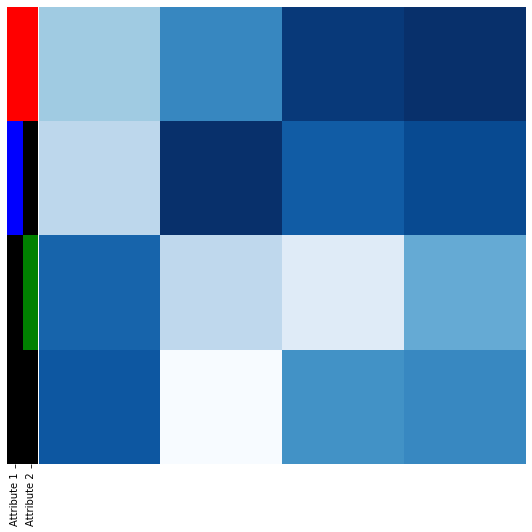

In [438]:
data = np.random.rand(4,4)

colors_1 = ['r','g','b','k']
attributes_1 = ['a','c','b','c']
series = pd.DataFrame(attributes_1)[0]
series.name = 'Attribute 1'
lut = dict(zip(attributes_1, colors_1))
row_colors_1 = series.map(lut)

colors_2 = ['r','g','b','k']
attributes_2 = ['b','c','a','a']
series = pd.DataFrame(attributes_2)[0]
series.name = 'Attribute 2'
lut = dict(zip(attributes_2, colors_2))
row_colors_2 = series.map(lut)

row_colors = pd.concat([row_colors_1,row_colors_2],axis=1)

c = clustermap(pd.DataFrame(data),
               figsize=(7.5,7.5),
               cbar_pos=None, 
               xticklabels=[], 
               yticklabels=[], 
               cmap='Blues_r', 
               dendrogram_ratio=[0,0],
               col_cluster=True,
               row_cluster=True,
               row_colors = row_colors,
               cbar_kws={"size": 20}
)